In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# import pandas_datareader as pdr
import datetime as dt
sns.set()

<b><font size="5">Section 1</font> </b>

In [11]:
# stocks_1 = "CVX SPY".split()
year = 364
#We allocate one year to post covid alanisis
post_covid_period = dt.date.today() - dt.timedelta(year)
#We will alocate from 2019 to 2021 to Covid Period (total of two years)
covid_period = dt.date.today() -dt.timedelta(3*year)
# We will allocate before covid form 2015 until 2019
pre_covid_period = dt.date.today() - dt.timedelta(7*year)

In [12]:
stocks_tech = ['SPY','AAPL', 'MSFT', 'NVDA']
stocks_auto = ['SPY','F', 'TSLA', 'GM']
stocks_energy = ['SPY','CVX', 'XOM', 'VLO']

stocks = stocks_energy

post_covid_data = pdr.get_data_yahoo(stocks, post_covid_period)["Close"]
covid_data = pdr.get_data_yahoo(stocks, covid_period, post_covid_period)["Close"]
pre_covid_data = pdr.get_data_yahoo(stocks, pre_covid_period, covid_period)["Close"]
print(post_covid_data)
print(covid_data)

Symbols            SPY         CVX        XOM         VLO
Date                                                     
2021-08-06  442.489990  101.949997  57.860001   66.500000
2021-08-09  442.130005  100.250000  57.200001   66.000000
2021-08-10  442.679993  102.080002  58.180000   66.900002
2021-08-11  443.779999  102.849998  58.349998   66.839996
2021-08-12  445.109985  102.639999  57.349998   67.250000
...                ...         ...        ...         ...
2022-08-01  410.769989  160.509995  94.480003  110.650002
2022-08-02  408.059998  159.139999  94.070000  112.989998
2022-08-03  414.450012  155.360001  91.019997  107.809998
2022-08-04  414.170013  151.139999  87.190002  104.330002
2022-08-05  413.470001  153.639999  88.449997  104.989998

[252 rows x 4 columns]
Symbols            SPY         CVX        XOM        VLO
Date                                                    
2019-08-09  291.619995  122.419998  70.839996  78.849998
2019-08-12  288.070007  121.550003  69.629997  77.1

In [13]:
# returns = (np.log(post_covid_data).diff()).dropna()
returns_post = (post_covid_data.diff()).dropna()
returns_during = (covid_data.diff()).dropna()
returns_pre = (pre_covid_data.diff()).dropna()
# print(returns_post)
# print(returns_during)
# print(returns_pre)
returns_pre

Symbols,SPY,CVX,XOM,VLO
Date,,,,
2015-08-17,1.169998,-2.759995,0.409996,1.599998
2015-08-18,-0.610001,0.209999,-0.869995,-0.250000
2015-08-19,-1.659988,-2.529999,-1.669998,-1.599998
2015-08-20,-4.350006,-1.670006,-1.660004,-0.620003
2015-08-21,-6.139999,-3.479996,-2.440002,-6.110001
...,...,...,...,...
2019-08-05,-8.799988,-1.990005,-1.470001,-6.290001
2019-08-06,3.979980,0.639999,0.680000,1.059998
2019-08-07,0.170013,-0.279999,-0.459999,-1.029999


In [14]:
# sample= returns.sample(60).corr()
#before
corlation= returns_pre.corr()
# mask=np.ones_like(corlation, dtype=np.bool)
# mask = np.triu(mask)
# sb.heatmap(corlation, annot=True, mask=mask)
corlation

Symbols,SPY,CVX,XOM,VLO
Symbols,,,,
SPY,1.000000,0.592395,0.616105,0.533425
CVX,0.592395,1.000000,0.738962,0.416529
XOM,0.616105,0.738962,1.000000,0.411238
VLO,0.533425,0.416529,0.411238,1.000000


/var/folders/1t/m9qyn8j15gz5jj9pg_bkmwbc0000gn/T/ipykernel_18761/3667582790.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.ones_like(corlation_pre, dtype=np.bool)


Text(0.5, 21.5, '')

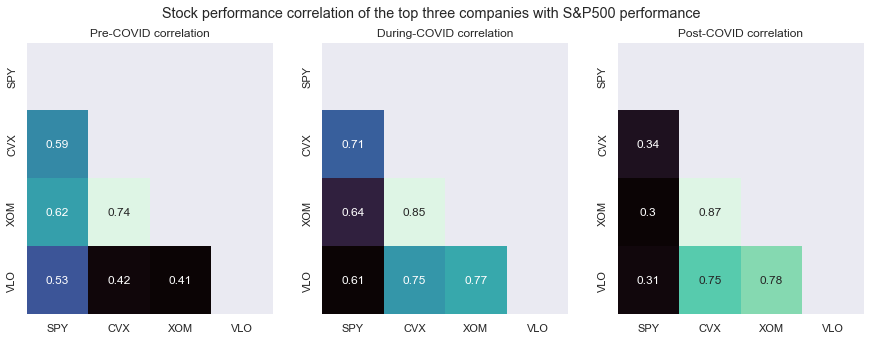

In [16]:
# sample= returns.sample(60).corr()
#During Covid
fig,axs = plt.subplots(1,3, figsize=(15,5))
fig.subplots_adjust(hspace=.2, wspace=.2)
fig.suptitle('Stock performance correlation of the top three companies with S&P500 performance')

corlation_pre= returns_pre.corr()
corlation_during= returns_during.corr()
corlation_post= returns_post.corr()
mask=np.ones_like(corlation_pre, dtype=np.bool)
mask = np.triu(mask)
sns.heatmap(corlation_pre, annot=True, ax=axs[0],cmap='mako',cbar=False, mask=mask)
sns.heatmap(corlation_during, annot=True, ax=axs[1],cmap='mako',cbar=False, mask=mask)
sns.heatmap(corlation_post, annot=True, ax=axs[2],cmap='mako',cbar=False, mask=mask)
axs[0].set_title('Pre-COVID correlation') 
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_title('During-COVID correlation')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[2].set_title('Post-COVID correlation')
axs[2].set_ylabel('')
axs[2].set_xlabel('')

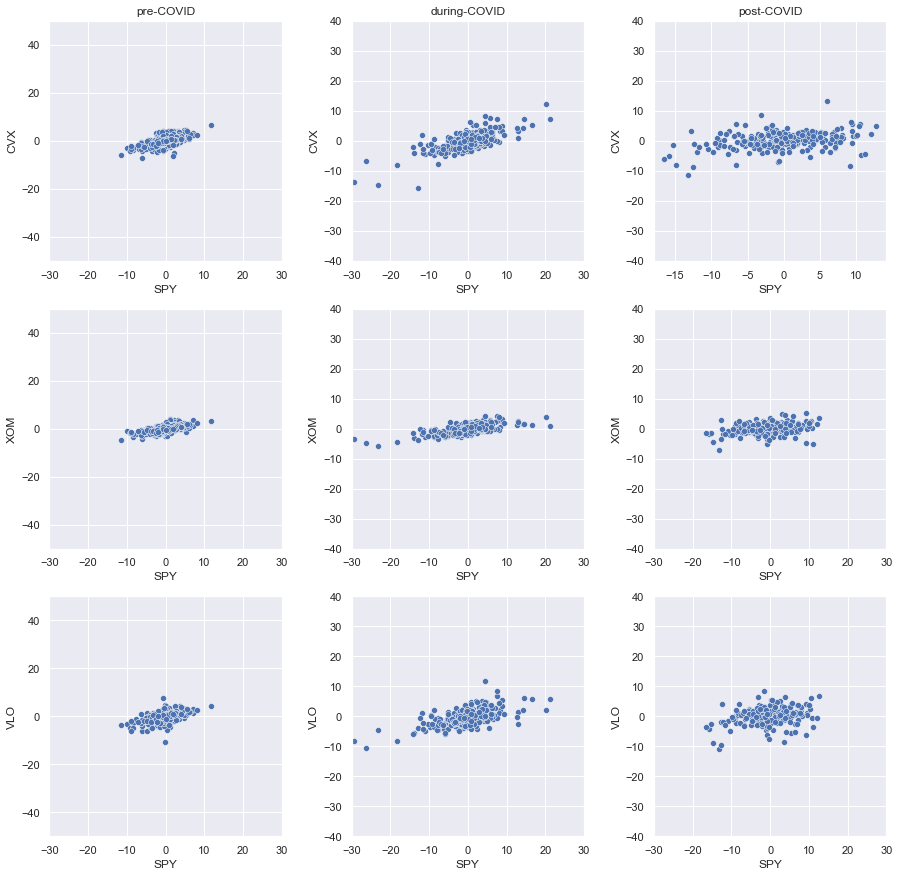

In [18]:
# sample = returns.sample(60)

cols = ['pre-COVID','during-COVID','post-COVID']

fig,axs = plt.subplots(3,3, figsize=(15,15))
fig.subplots_adjust(hspace=.2, wspace=.3)
for ax, col in zip(axs[0], cols):
    ax.set_title(col)
for x in range(0,3):
    if x == 0:
        sample = returns_pre
        axs[0][x].set_ylim(-50, 50)
        axs[0][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[0][x],x=returns_pre['SPY'], y=returns_pre[stocks[1]], data=sample )
        axs[1][x].set_ylim(-50, 50)
        axs[1][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[1][x],x=returns_pre['SPY'], y=returns_pre[stocks[2]],  data=sample)
        axs[2][x].set_ylim(-50, 50)
        axs[2][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[2][x],x=returns_pre['SPY'], y=returns_pre[stocks[3]],  data=sample)
    elif x==1:
        sample = returns_during
        axs[0][x].set_ylim(-40, 40)
        axs[0][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[0][x],x=returns_during['SPY'], y=returns_during[stocks[1]],  data=sample)
        axs[1][x].set_ylim(-40, 40)
        axs[1][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[1][x],x=returns_during['SPY'], y=returns_during[stocks[2]], data=sample)
        axs[2][x].set_ylim(-40, 40)
        axs[2][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[2][x],x=returns_during['SPY'], y=returns_during[stocks[3]], data=sample)
    else:
        sample = returns_post
        axs[0][x].set_ylim(-40, 40)
        axs[1][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[0][x],x=returns_post['SPY'], y=returns_post[stocks[1]],  data=sample)
        axs[1][x].set_ylim(-40, 40)
        axs[1][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[1][x],x=returns_post['SPY'], y=returns_post[stocks[2]],  data=sample)
        axs[2][x].set_ylim(-40, 40)
        axs[2][x].set_xlim(-30, 30)
        sns.scatterplot(ax=axs[2][x],x=returns_post['SPY'], y=returns_post[stocks[3]],  data=sample)
        

In [19]:
indicators = ['SPY','^DJI', '^IXIC']
data = pd.DataFrame(pdr.get_data_yahoo(indicators, post_covid_period)['Close'])
data = round(data,2)
data.index.to_pydatetime()
data.reset_index( inplace=True)
data.reset_index( inplace=True)
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.tail()
# data.info()

Symbols,index,Date,SPY,^DJI,^IXIC
247,247,2022-08-01,410.77,32798.40,12368.98
248,248,2022-08-02,408.06,32396.17,12348.76
249,249,2022-08-03,414.45,32812.50,12668.16
250,250,2022-08-04,414.17,32726.82,12720.58
251,251,2022-08-05,413.47,32803.47,12657.55


In [20]:
reg_spy = np.polyfit(data['index'], data["SPY"], deg = 1)
reg_DJI = np.polyfit(data['index'], data["^DJI"], deg = 1)
reg_NASDAQ = np.polyfit(data['index'], data["^IXIC"], deg = 1)
print(reg_spy)
print(reg_DJI)
print(reg_NASDAQ)

[-2.72638945e-01  4.69049283e+02]
[-1.71204705e+01  3.63078619e+04]
[  -17.9200764  16088.61252431]


Text(0.5, 0, 'DAYS')

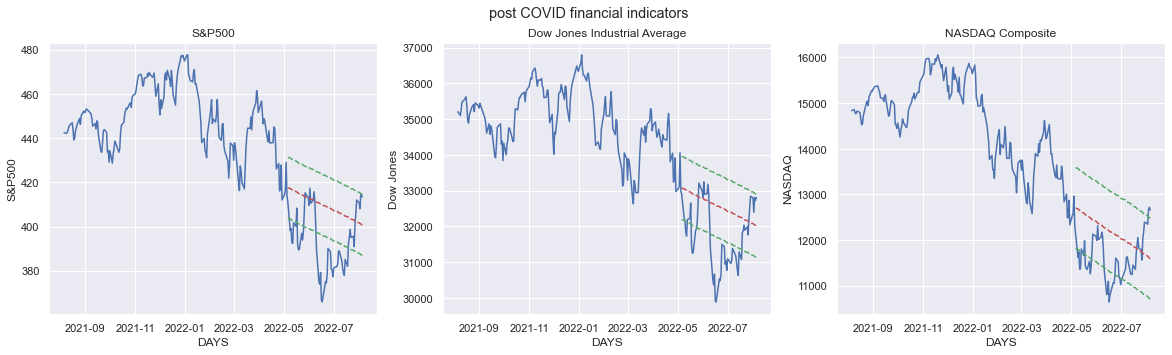

In [21]:
fig,axs = plt.subplots(1,3, figsize=(20,5))
fig.subplots_adjust(hspace=.2, wspace=.2)
fig.suptitle('post COVID financial indicators')


trend_SPY = np.polyval(reg_spy, data['index'][-63:])
std_SPY = data['SPY'][-63:].std()
axs[0].plot(data['Date'], data['SPY'], label ="S&P500")
axs[0].plot(data['Date'][-63:], trend_SPY, 'r--')
axs[0].plot(data['Date'][-63:], trend_SPY - std_SPY, 'g--')
axs[0].plot(data['Date'][-63:], trend_SPY + std_SPY, 'g--');
axs[0].set_ylabel('S&P500')
axs[0].set_title('S&P500')
axs[0].set_xlabel('DAYS')

trend_DJI = np.polyval(reg_DJI, data['index'][-63:])
std_DJI = data['^DJI'][-63:].std()
axs[1].plot(data['Date'], data['^DJI'], label ="Dow Jones Industrial Average")
axs[1].plot(data['Date'][-63:], trend_DJI, 'r--')
axs[1].plot(data['Date'][-63:], trend_DJI - std_DJI, 'g--')
axs[1].plot(data['Date'][-63:], trend_DJI + std_DJI, 'g--');
axs[1].set_ylabel('Dow Jones')
axs[1].set_title('Dow Jones Industrial Average')
axs[1].set_xlabel('DAYS')

trend_NASDAQ = np.polyval(reg_NASDAQ, data['index'][-63:])
std_NASDAQ = data['^DJI'][-63:].std()
axs[2].plot(data['Date'], data['^IXIC'], label ="NASDAQ Composite")
axs[2].plot(data['Date'][-63:], trend_NASDAQ, 'r--')
axs[2].plot(data['Date'][-63:], trend_NASDAQ - std_NASDAQ, 'g--')
axs[2].plot(data['Date'][-63:], trend_NASDAQ + std_NASDAQ, 'g--');
axs[2].set_ylabel('NASDAQ')
axs[2].set_title('NASDAQ Composite')
axs[2].set_xlabel('DAYS')

Text(0.5, 0, 'DAYS')

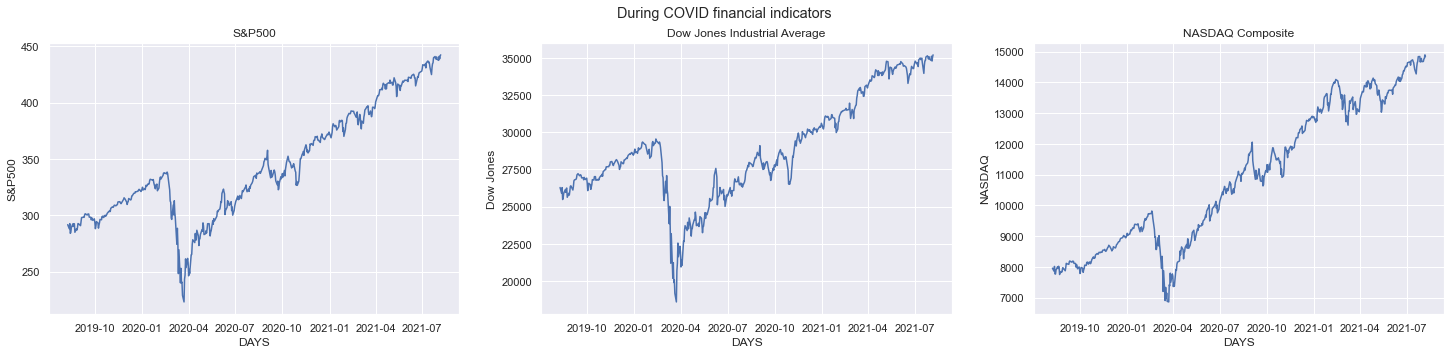

In [22]:
data = pd.DataFrame(pdr.get_data_yahoo(indicators, covid_period, post_covid_period)['Close'])
data = round(data,2)
data.index.to_pydatetime()
data.reset_index( inplace=True)
data.reset_index( inplace=True)
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')
reg_spy = np.polyfit(data['index'], data["SPY"], deg = 1)
reg_DJI = np.polyfit(data['index'], data["^DJI"], deg = 1)
reg_NASDAQ = np.polyfit(data['index'], data["^IXIC"], deg = 1)
fig,axs = plt.subplots(1,3, figsize=(25,5))
fig.subplots_adjust(hspace=.2, wspace=.2)
fig.suptitle('During COVID financial indicators')


trend_SPY = np.polyval(reg_spy, data['index'][-63:])
std_SPY = data['SPY'][-63:].std()
axs[0].plot(data['Date'], data['SPY'], label ="S&P500")
# axs[0].plot(data['Date'][-63:], trend_SPY, 'r--')
# axs[0].plot(data['Date'][-63:], trend_SPY - std_SPY, 'g--')
# axs[0].plot(data['Date'][-63:], trend_SPY + std_SPY, 'g--');
axs[0].set_ylabel('S&P500')
axs[0].set_title('S&P500')
axs[0].set_xlabel('DAYS')

trend_DJI = np.polyval(reg_DJI, data['index'][-63:])
std_DJI = data['^DJI'][-63:].std()
axs[1].plot(data['Date'], data['^DJI'], label ="Dow Jones Industrial Average")
# axs[1].plot(data['Date'][-63:], trend_DJI, 'r--')
# axs[1].plot(data['Date'][-63:], trend_DJI - std_DJI, 'g--')
# axs[1].plot(data['Date'][-63:], trend_DJI + std_DJI, 'g--');
axs[1].set_ylabel('Dow Jones')
axs[1].set_title('Dow Jones Industrial Average')
axs[1].set_xlabel('DAYS')

trend_NASDAQ = np.polyval(reg_NASDAQ, data['index'][-63:])
std_NASDAQ = data['^DJI'][-63:].std()
axs[2].plot(data['Date'], data['^IXIC'], label ="NASDAQ Composite")
# axs[2].plot(data['Date'][-63:], trend_NASDAQ, 'r--')
# axs[2].plot(data['Date'][-63:], trend_NASDAQ - std_NASDAQ, 'g--')
# axs[2].plot(data['Date'][-63:], trend_NASDAQ + std_NASDAQ, 'g--');
axs[2].set_ylabel('NASDAQ')
axs[2].set_title('NASDAQ Composite')
axs[2].set_xlabel('DAYS')

Text(0.5, 0, 'DAYS')

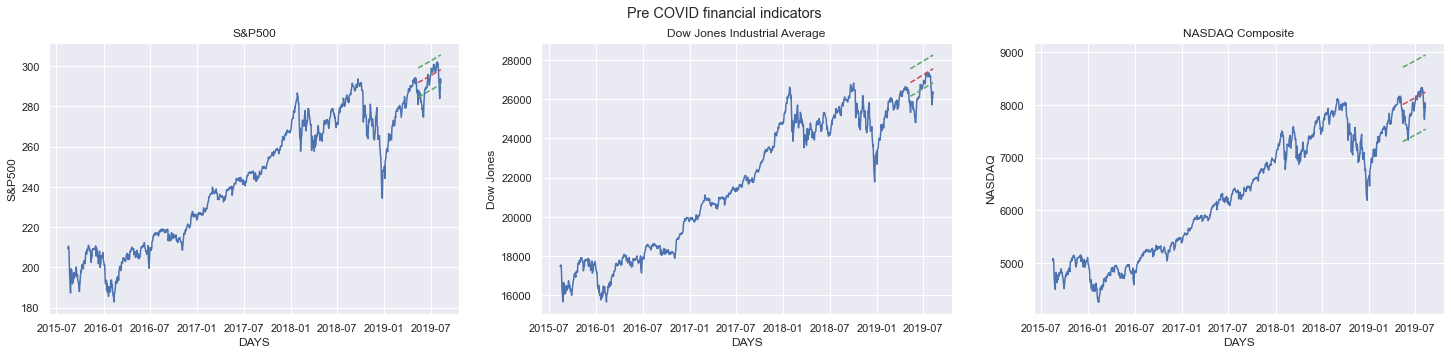

In [23]:
data = pd.DataFrame(pdr.get_data_yahoo(indicators,  pre_covid_period, covid_period)['Close'])
data = round(data,2)
data.index.to_pydatetime()
data.reset_index( inplace=True)
data.reset_index( inplace=True)
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')
reg_spy = np.polyfit(data['index'], data["SPY"], deg = 1)
reg_DJI = np.polyfit(data['index'], data["^DJI"], deg = 1)
reg_NASDAQ = np.polyfit(data['index'], data["^IXIC"], deg = 1)
fig,axs = plt.subplots(1,3, figsize=(25,5))
fig.subplots_adjust(hspace=.2, wspace=.2)
fig.suptitle('Pre COVID financial indicators')


trend_SPY = np.polyval(reg_spy, data['index'][-63:])
std_SPY = data['SPY'][-63:].std()
axs[0].plot(data['Date'], data['SPY'], label ="S&P500")
axs[0].plot(data['Date'][-63:], trend_SPY, 'r--')
axs[0].plot(data['Date'][-63:], trend_SPY - std_SPY, 'g--')
axs[0].plot(data['Date'][-63:], trend_SPY + std_SPY, 'g--');
axs[0].set_ylabel('S&P500')
axs[0].set_title('S&P500')
axs[0].set_xlabel('DAYS')

trend_DJI = np.polyval(reg_DJI, data['index'][-63:])
std_DJI = data['^DJI'][-63:].std()
axs[1].plot(data['Date'], data['^DJI'], label ="Dow Jones Industrial Average")
axs[1].plot(data['Date'][-63:], trend_DJI, 'r--')
axs[1].plot(data['Date'][-63:], trend_DJI - std_DJI, 'g--')
axs[1].plot(data['Date'][-63:], trend_DJI + std_DJI, 'g--');
axs[1].set_ylabel('Dow Jones')
axs[1].set_title('Dow Jones Industrial Average')
axs[1].set_xlabel('DAYS')

trend_NASDAQ = np.polyval(reg_NASDAQ, data['index'][-63:])
std_NASDAQ = data['^DJI'][-63:].std()
axs[2].plot(data['Date'], data['^IXIC'], label ="NASDAQ Composite")
axs[2].plot(data['Date'][-63:], trend_NASDAQ, 'r--')
axs[2].plot(data['Date'][-63:], trend_NASDAQ - std_NASDAQ, 'g--')
axs[2].plot(data['Date'][-63:], trend_NASDAQ + std_NASDAQ, 'g--');
axs[2].set_ylabel('NASDAQ')
axs[2].set_title('NASDAQ Composite')
axs[2].set_xlabel('DAYS')

<b><font size="5">Section 2</font> </b>

In [5]:
sp500_co = pd.read_csv('../S&P500/sp500_companies.csv')

In [6]:
sp500_co.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,162.51,2666203971584,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.080248
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,280.74,2107790196736,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.063441
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,891.45,895247581184,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.026946
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,300.60,673124515840,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020260
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,542.34,510803509248,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015374


In [7]:
# create symbol to sector mapping
symbols = sp500_co['Symbol']
sectors = sp500_co['Sector']
sector_mapping = dict(zip(symbols,sectors))

# calculate number of shares for each stock symbol
sp500_co['Num_Shares'] = sp500_co['Marketcap'] / sp500_co['Currentprice']
num_shares = sp500_co['Num_Shares']
shares_mapping = dict(zip(symbols,num_shares))

In [8]:
sp500_stocks = pd.read_csv('../S&P500/sp500_stocks.csv')

In [9]:
sp500_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2009-12-31,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
2,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
3,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
4,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0


In [10]:
# add sector & num shares for stock symboles
sp500_stocks['Sector'] = sp500_stocks['Symbol'].map(sector_mapping)
sp500_stocks['Num_shares'] = sp500_stocks['Symbol'].map(shares_mapping)

# extrapolate historical marketcap
sp500_stocks['Marketcap'] = sp500_stocks['Close'] * sp500_stocks['Num_shares']

# drop useless columns
drop_columns = ['High','Low','Open']
sp500_stocks.drop(drop_columns,axis=1,inplace=True)

In [11]:
# Add company name column
names = sp500_co['Shortname']
name_mapping = dict(zip(symbols,names))
sp500_stocks['Name'] = sp500_stocks['Symbol'].map(name_mapping)

In [12]:
import datetime as dt

# Extract year and create a new column to calculate avg marketcap in a year
sp500_stocks['Date'] = pd.to_datetime(sp500_stocks['Date'], format='%Y-%m-%d')
sp500_stocks['Year'] = sp500_stocks['Date'].dt.year
sp500_stocks.head()

,Date,Symbol,Adj Close,Close,Volume,Sector,Num_shares,Marketcap,Name,Year
0,2009-12-31,MMM,NaN,NaN,NaN,Industrials,5.696040e+08,NaN,3M Company,2009
1,2010-01-04,MMM,59.318886,83.019997,3043700.0,Industrials,5.696040e+08,4.728852e+10,3M Company,2010
2,2010-01-05,MMM,58.947342,82.500000,2847000.0,Industrials,5.696040e+08,4.699233e+10,3M Company,2010
3,2010-01-06,MMM,59.783295,83.669998,5268500.0,Industrials,5.696040e+08,4.765876e+10,3M Company,2010
4,2010-01-07,MMM,59.826176,83.730003,4470100.0,Industrials,5.696040e+08,4.769294e+10,3M Company,2010


In [15]:
# Data Cleaning
# Data will start approx. 5 years before COVID
sp500_stocks_window = sp500_stocks[sp500_stocks.Date >= "2010-01-01"]

# Some companies IPO'd during this timeframe. If they don't have "Close" date those rows will be removed.
sp500_stocks_window =  sp500_stocks_window [sp500_stocks_window.Close.notnull()] 

#List of companies missing Sector, Num_shares, Market_Cap
symbols_missing = sp500_stocks_window[sp500_stocks_window.isnull().any(axis=1)].Symbol.value_counts().index
symbols_missing
#Uses packages to access missing information
objects = []
for i in symbols_missing:
    objects.append(yf.Ticker(i).info)

In [17]:
# Iterates through objects (dictionaries) to fill in missing data
for i in range(len(objects)):
    sp500_stocks_window.loc[(sp500_stocks_window['Symbol'] == objects[i]["symbol"] ), 'Sector'] = str(objects[i]["sector"])
    sp500_stocks_window.loc[(sp500_stocks_window['Symbol'] == objects[i]["symbol"] ), 'Num_shares'] = (objects[i]["sharesOutstanding"])
    sp500_stocks_window.loc[(sp500_stocks_window['Symbol'] == objects[i]["symbol"] ), 'Name'] = str(objects[i]["shortName"])                    

In [18]:
# Recalculates mmarketcap for those that had missing values
sp500_stocks_window['Marketcap'] = sp500_stocks_window['Close'] * sp500_stocks_window['Num_shares']

# Shows that there are 0 NAN values remaining
sp500_stocks_window.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523846 entries, 1 to 1595012
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1523846 non-null  datetime64[ns]
 1   Symbol      1523846 non-null  object        
 2   Adj Close   1523846 non-null  float64       
 3   Close       1523846 non-null  float64       
 4   Volume      1523846 non-null  float64       
 5   Sector      1523846 non-null  object        
 6   Num_shares  1495827 non-null  float64       
 7   Marketcap   1495827 non-null  float64       
 8   Name        1523846 non-null  object        
 9   Year        1523846 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 127.9+ MB


In [19]:
sp500_stocks_window.head()

,Date,Symbol,Adj Close,Close,Volume,Sector,Num_shares,Marketcap,Name,Year
1,2010-01-04,MMM,59.318886,83.019997,3043700.0,Industrials,5.696040e+08,4.728852e+10,3M Company,2010
2,2010-01-05,MMM,58.947342,82.500000,2847000.0,Industrials,5.696040e+08,4.699233e+10,3M Company,2010
3,2010-01-06,MMM,59.783295,83.669998,5268500.0,Industrials,5.696040e+08,4.765876e+10,3M Company,2010
4,2010-01-07,MMM,59.826176,83.730003,4470100.0,Industrials,5.696040e+08,4.769294e+10,3M Company,2010
5,2010-01-08,MMM,60.247749,84.320000,3405800.0,Industrials,5.696040e+08,4.802901e+10,3M Company,2010


In [20]:
# clear nan values in sectors
sectors = sp500_stocks_window['Sector'].unique()
sectors = [i for i in sp500_stocks_window['Sector'].unique() if i is not np.nan]
sectors

['Industrials',
 'Healthcare',
 'Technology',
 'Communication Services',
 'Consumer Defensive',
 'Consumer Cyclical',
 'Utilities',
 'Financial Services',
 'Basic Materials',
 'Real Estate',
 'Energy']

In [21]:
# sector concentration post covid
post_covid = '2022-07-22'

post_table = sp500_stocks_window[(sp500_stocks_window['Date'] == post_covid) &\
                         (sp500_stocks_window['Sector'].isin(sectors))]
top3_post_covid = post_table.groupby('Sector')['Marketcap']\
.apply(lambda x: x.nlargest(3).sum())
sector_total_post = post_table.groupby('Sector')['Marketcap'].sum()
sector_total_post

Sector
Basic Materials           7.670196e+11
Communication Services    1.485594e+12
Consumer Cyclical         2.861691e+12
Consumer Defensive        2.795728e+12
Energy                    1.393536e+12
Financial Services        4.299173e+12
Healthcare                4.943903e+12
Industrials               2.873913e+12
Real Estate               9.627609e+11
Technology                8.571963e+12
Utilities                 9.599951e+11
Name: Marketcap, dtype: float64

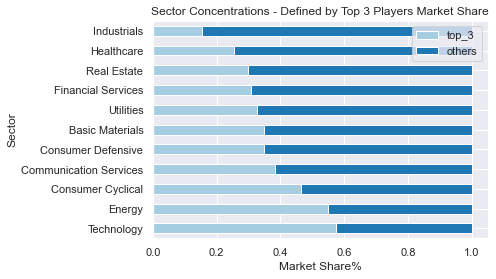

In [22]:
# plot post-covid current status quo
# Top 3 players total market cap divided by sector market cap

import matplotlib.pyplot as plt
import seaborn as sns

y_top3 = top3_post_covid / sector_total_post
y_top3.sort_values(ascending=False,inplace=True)
y_others = 1 - y_top3
x = y_top3.index

df = pd.DataFrame([y_top3,y_others],index=['top_3','others']).T

sns.set()
sns.set_palette("Paired")
df.plot.barh(stacked=True)
plt.title("Sector Concentrations - Defined by Top 3 Players Market Share")
plt.xlabel('Market Share%')
plt.show()

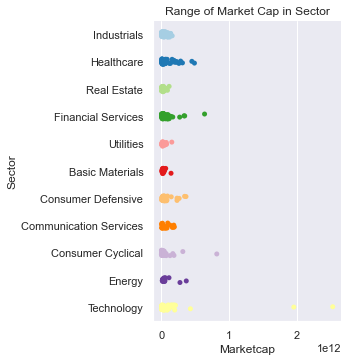

In [23]:
# analyze range of marketcap by sector
# Technology sector has the most outliers - the big players are huge. Consumer and Financial also
# Energy, Communications marketcap range is much smaller

sectors_sorted = list(x)[::-1]
sns.catplot(x='Marketcap',y='Sector',data=post_table,order=sectors_sorted)
plt.title("Range of Market Cap in Sector")
plt.show()

In [24]:
# create dataframe of top-3 player marketshare by sector
top3_market_share = []

for sector in sectors:
    sector_marcap = sp500_stocks_window[sp500_stocks_window['Sector'] == sector].groupby('Date')\
    ['Marketcap'].sum()
    top3 = sp500_stocks_window[sp500_stocks_window['Sector'] == sector].groupby('Date')\
    ['Marketcap'].apply(lambda x: x.nlargest(3).sum())
    share = top3 / sector_marcap
    top3_market_share.append(share)

market_share_df = pd.DataFrame(top3_market_share,index=sectors)
market_share_df = market_share_df.T
market_share_df

,Industrials,Healthcare,Technology,Communication Services,Consumer Defensive,Consumer Cyclical,Utilities,Financial Services,Basic Materials,Real Estate,Energy
Date,,,,,,,,,,,
2010-01-04,0.304015,0.349173,0.398118,0.679730,0.426034,0.309352,0.265949,0.301455,0.497140,0.225590,0.596813
2010-01-05,0.302263,0.348025,0.397055,0.671628,0.423504,0.310724,0.264390,0.302377,0.494741,0.226588,0.596503
2010-01-06,0.300142,0.348822,0.396065,0.669932,0.421980,0.312337,0.265173,0.302731,0.497495,0.225914,0.595146
2010-01-07,0.304158,0.346090,0.394973,0.668709,0.421488,0.312658,0.266299,0.302913,0.495454,0.224804,0.595457
2010-01-08,0.306672,0.347252,0.394782,0.669304,0.420766,0.315250,0.266088,0.302847,0.498170,0.223644,0.592934
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,0.154051,0.255555,0.572858,0.382326,0.350475,0.462940,0.326614,0.307868,0.347453,0.296403,0.547297
2022-07-26,0.150371,0.255151,0.571703,0.383826,0.346162,0.463599,0.324222,0.309117,0.346730,0.297987,0.548653
2022-07-27,0.149292,0.253343,0.574942,0.380119,0.348210,0.465467,0.324139,0.308226,0.339147,0.295414,0.547025


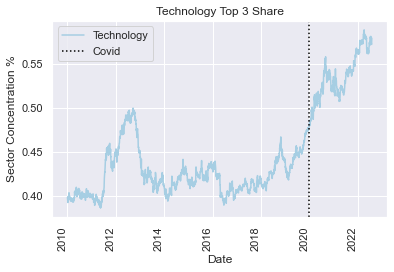

In [25]:
market_share_df['Technology'].plot()
plt.title("Technology Top 3 Share")
plt.axvline(x=pd.to_datetime('2020-1-1', format='%Y-%m-%d'),label='Covid',color='black',linestyle='dotted')
plt.xticks(rotation=90)
plt.ylabel("Sector Concentration %")
plt.legend()
plt.show()

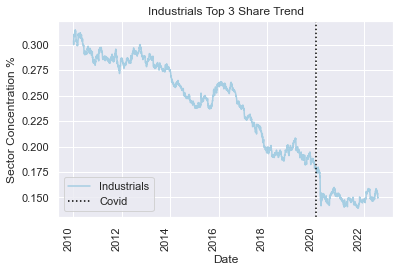

In [26]:
market_share_df['Industrials'].plot()
plt.title("Industrials Top 3 Share Trend")
plt.axvline(x=pd.to_datetime('2020-1-1', format='%Y-%m-%d'),label='Covid',color='black',linestyle='dotted')
plt.xticks(rotation=90)
plt.ylabel("Sector Concentration %")
plt.legend()
plt.show()

In [27]:
# study quarterly rate of change
market_share_df2 = market_share_df.copy()
market_share_df2['Period'] = pd.PeriodIndex(market_share_df2.index, freq='Q')
market_share_df2

,Industrials,Healthcare,Technology,Communication Services,Consumer Defensive,Consumer Cyclical,Utilities,Financial Services,Basic Materials,Real Estate,Energy,Period
Date,,,,,,,,,,,,
2010-01-04,0.304015,0.349173,0.398118,0.679730,0.426034,0.309352,0.265949,0.301455,0.497140,0.225590,0.596813,2010Q1
2010-01-05,0.302263,0.348025,0.397055,0.671628,0.423504,0.310724,0.264390,0.302377,0.494741,0.226588,0.596503,2010Q1
2010-01-06,0.300142,0.348822,0.396065,0.669932,0.421980,0.312337,0.265173,0.302731,0.497495,0.225914,0.595146,2010Q1
2010-01-07,0.304158,0.346090,0.394973,0.668709,0.421488,0.312658,0.266299,0.302913,0.495454,0.224804,0.595457,2010Q1
2010-01-08,0.306672,0.347252,0.394782,0.669304,0.420766,0.315250,0.266088,0.302847,0.498170,0.223644,0.592934,2010Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,0.154051,0.255555,0.572858,0.382326,0.350475,0.462940,0.326614,0.307868,0.347453,0.296403,0.547297,2022Q3
2022-07-26,0.150371,0.255151,0.571703,0.383826,0.346162,0.463599,0.324222,0.309117,0.346730,0.297987,0.548653,2022Q3
2022-07-27,0.149292,0.253343,0.574942,0.380119,0.348210,0.465467,0.324139,0.308226,0.339147,0.295414,0.547025,2022Q3


In [28]:
by_period = market_share_df2.groupby(['Period']).agg('mean')
by_period = by_period.loc['2017Q1':,:]
by_period_change = by_period.pct_change()
by_period_change

,Industrials,Healthcare,Technology,Communication Services,Consumer Defensive,Consumer Cyclical,Utilities,Financial Services,Basic Materials,Real Estate,Energy
Period,,,,,,,,,,,
2017Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017Q2,-0.023334,0.001140,0.008937,-0.062052,0.014835,0.008092,0.010125,-0.020588,0.037540,0.008075,0.007546
2017Q3,-0.027421,-0.000783,0.000746,-0.030001,0.043122,0.009717,0.005444,-0.009682,0.002483,0.024937,0.017241
2017Q4,-0.070120,0.025907,0.006282,0.003481,0.035396,0.019910,0.004166,-0.002688,-0.003773,0.015688,-0.013184
2018Q1,-0.037629,-0.020548,-0.006786,-0.039515,-0.031434,0.005497,0.019433,0.026457,-0.009917,0.026405,-0.030338
2018Q2,-0.018531,-0.007509,0.027560,-0.021292,-0.019114,0.014417,-0.024918,-0.011743,0.016951,-0.009356,-0.035482
2018Q3,-0.007647,-0.003408,0.032816,-0.006695,0.088443,0.039439,0.004115,0.017360,0.022668,0.001047,-0.007743
2018Q4,0.032744,0.041171,0.027998,0.063112,0.062088,0.034132,0.007132,0.030152,0.024526,0.046067,0.064600
2019Q1,0.023644,-0.030071,-0.048848,-0.022696,0.031244,0.013116,-0.011541,-0.019572,0.005586,0.003434,0.017792


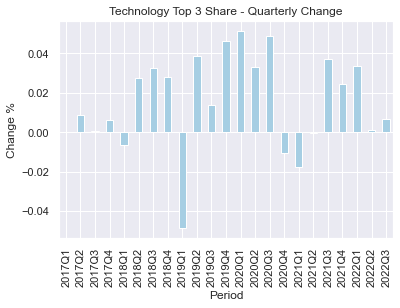

In [29]:
# Technology
by_period_change = by_period.pct_change()
by_period_change['Technology'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel("Change %")
plt.title("Technology Top 3 Share - Quarterly Change")
plt.show()

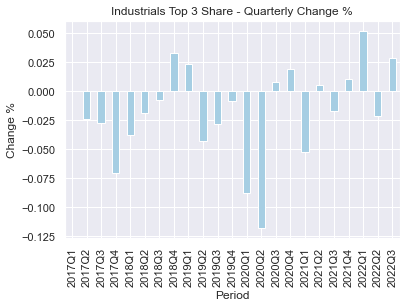

In [30]:
# Industrials
by_period_change = by_period.pct_change()
by_period_change['Industrials'].plot(kind='bar')
plt.title("Industrials Top 3 Share - Quarterly Change %")
plt.ylabel("Change %")
plt.xticks(rotation=90)
plt.show()

In [31]:
# Get total historical rankings of top companies from 2010-2022

# zoom-in on a few interesting sectors
interesting_sectors = ['Technology', 'Industrials']

# remove 2009 due to lots of empty values
years = sp500_stocks_window['Year'].unique().tolist()
total_rankings_df = []

for sector in interesting_sectors:
    # filter sector data and extract current top symboles
    sector_data = sp500_stocks_window[sp500_stocks_window['Sector'] == sector]
    avg_marcap = sector_data.groupby(['Year','Name'])['Marketcap'].agg('mean')
    current_top3 = avg_marcap[2022].sort_values(ascending=False).\
                      index[:5].tolist()
    
# np.where(avg_marcap[2010].sort_values(ascending=False).index == 'Visa Inc.')[0]
    
    # extract historical rankings from 2010-2022
    hist_rankings = []
    for company in current_top3:
        rankings = []
        for year in years:
            sorted_marcap = avg_marcap[year].sort_values(ascending=False)
            rankings.append(int(np.where(sorted_marcap.index == company)[0])+1)
        hist_rankings.append(rankings)

    rankings_df = pd.DataFrame(dict(zip(current_top3,hist_rankings)),index=years)
    total_rankings_df.append(rankings_df)

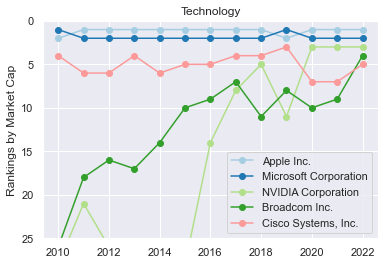

In [32]:
total_rankings_df[0].plot(marker='o')
plt.ylabel("Rankings by Market Cap")
plt.ylim((0,25))
plt.gca().invert_yaxis()
plt.title("Technology")
fig = plt.gcf()
plt.show()

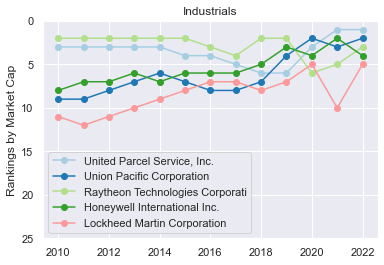

In [33]:
total_rankings_df[1].plot(marker='o')
plt.ylabel("Rankings by Market Cap")
plt.ylim((0,25))
plt.gca().invert_yaxis()
plt.title("Industrials")
fig = plt.gcf()
plt.show()

In [34]:
# create symbol to sub-sector mapping
symbols = sp500_co['Symbol']
subsectors = sp500_co['Industry']
subsector_mapping = dict(zip(symbols,subsectors))

# create subsectors column
sp500_stocks_window['Subsector'] = sp500_stocks_window['Symbol'].map(subsector_mapping)

sp500_stocks_window.head()

,Date,Symbol,Adj Close,Close,Volume,Sector,Num_shares,Marketcap,Name,Year,Subsector
1,2010-01-04,MMM,59.318886,83.019997,3043700.0,Industrials,5.696040e+08,4.728852e+10,3M Company,2010,Conglomerates
2,2010-01-05,MMM,58.947342,82.500000,2847000.0,Industrials,5.696040e+08,4.699233e+10,3M Company,2010,Conglomerates
3,2010-01-06,MMM,59.783295,83.669998,5268500.0,Industrials,5.696040e+08,4.765876e+10,3M Company,2010,Conglomerates
4,2010-01-07,MMM,59.826176,83.730003,4470100.0,Industrials,5.696040e+08,4.769294e+10,3M Company,2010,Conglomerates
5,2010-01-08,MMM,60.247749,84.320000,3405800.0,Industrials,5.696040e+08,4.802901e+10,3M Company,2010,Conglomerates


In [35]:
# create subset data for tech
# create df grouped by subsector
tech_subset = sp500_stocks_window[sp500_stocks_window['Sector']=='Technology']

# Simplify subsector categories
update = {'Software—Infrastructure':'Software','Software—Application':'Software',\
                     'Semiconductor Equipment & Materials':'Semiconductor','Semiconductors':'Semiconductor'}
tech_subset['Subsector'] = tech_subset['Subsector'].replace(update)
tech_subset

# Normalize subsector data as % of total tech sector
subsector_data = tech_subset.groupby(['Year','Subsector'])['Marketcap'].sum()
tech_total = tech_subset.groupby('Year')['Marketcap'].sum()
normalized_subsector_data = subsector_data / tech_total
normalized_subsector_data[2015]

C:\Users\gonza\AppData\Local\Temp\ipykernel_15272\2179831361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_subset['Subsector'] = tech_subset['Subsector'].replace(update)


Subsector
Communication Equipment               0.062071
Computer Hardware                     0.028597
Consumer Electronics                  0.212142
Electronic Components                 0.023804
Information Technology Services       0.145512
Scientific & Technical Instruments    0.010627
Semiconductor                         0.208391
Software                              0.307916
Solar                                 0.000939
Name: Marketcap, dtype: float64

In [37]:
tech_subset['Subsector'].unique()

array(['Information Technology Services', 'Software', 'Semiconductor',
       'Electronic Components', 'Consumer Electronics',
       'Computer Hardware', 'Communication Equipment', 'Solar',
       'Scientific & Technical Instruments'], dtype=object)

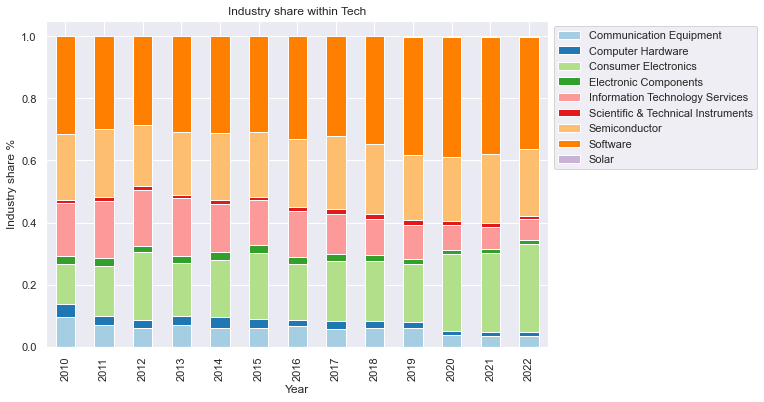

In [38]:
# plot industry share of tech
normalized_subsector_data.unstack('Subsector').plot(kind='bar',stacked=True,\
                                                   figsize=(9,6))
plt.ylabel("Industry share %")
plt.title("Industry share within Tech")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.show()

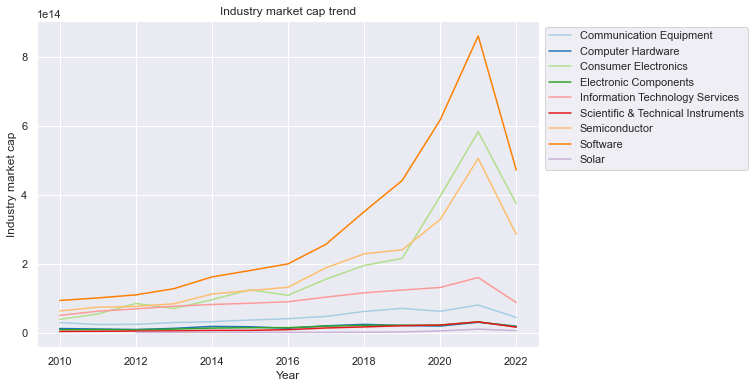

In [39]:
# plot industry total market cap
subsector_data.unstack('Subsector').plot(figsize=(9,6))

plt.ylabel("Industry market cap")
plt.title("Industry market cap trend")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.show()

<b><font size="5">Section 3</font> </b>

In [40]:
# Data Cleaning
# Data will start approx. 5 years before COVID
sp500_stocks_window = sp500_stocks[sp500_stocks.Date >= "2014-12-01"]

# Some companies IPO'd during this timeframe. If they don't have "Close" date those rows will be removed.
sp500_stocks_window =  sp500_stocks_window [sp500_stocks_window.Close.notnull()] 

#List of companies missing Sector, Num_shares, Market_Cap
symbols_missing = sp500_stocks_window[sp500_stocks_window.isnull().any(axis=1)].Symbol.value_counts().index

In [41]:
#Uses packages to access missing information
objects = []
for i in symbols_missing:
    objects.append(yf.Ticker(i).info)

In [43]:
# Iterates through objects (dictionaries) to fill in missing data
for i in range(len(objects)):
    sp500_stocks_window.loc[(sp500_stocks_window['Symbol'] == objects[i]["symbol"] ), 'Sector'] = str(objects[i]["sector"])
    sp500_stocks_window.loc[(sp500_stocks_window['Symbol'] == objects[i]["symbol"] ), 'Num_shares'] = (objects[i]["sharesOutstanding"])
    sp500_stocks_window.loc[(sp500_stocks_window['Symbol'] == objects[i]["symbol"] ), 'Name'] = str(objects[i]["shortName"])                    

In [44]:
# Recalculates mmarketcap for those that had missing values
sp500_stocks_window['Marketcap'] = sp500_stocks_window['Close'] * sp500_stocks_window['Num_shares']

# Shows that there are 0 NAN values remaining
sp500_stocks_window.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954353 entries, 1238 to 1595012
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        954353 non-null  datetime64[ns]
 1   Symbol      954353 non-null  object        
 2   Adj Close   954353 non-null  float64       
 3   Close       954353 non-null  float64       
 4   Volume      954353 non-null  float64       
 5   Sector      954353 non-null  object        
 6   Num_shares  936859 non-null  float64       
 7   Marketcap   936859 non-null  float64       
 8   Name        954353 non-null  object        
 9   Year        954353 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 80.1+ MB


In [45]:
# Checked to make sure representation of companies was similar in the before, during, and after

start_covid = "2019-12-01"
end_covid = "2022-01-01"

before_table = sp500_stocks_window[sp500_stocks_window.Date < start_covid]

during_table = sp500_stocks_window[(sp500_stocks_window.Date > start_covid) & (sp500_stocks_window.Date < end_covid)]

post_table = sp500_stocks_window[sp500_stocks_window.Date > end_covid]

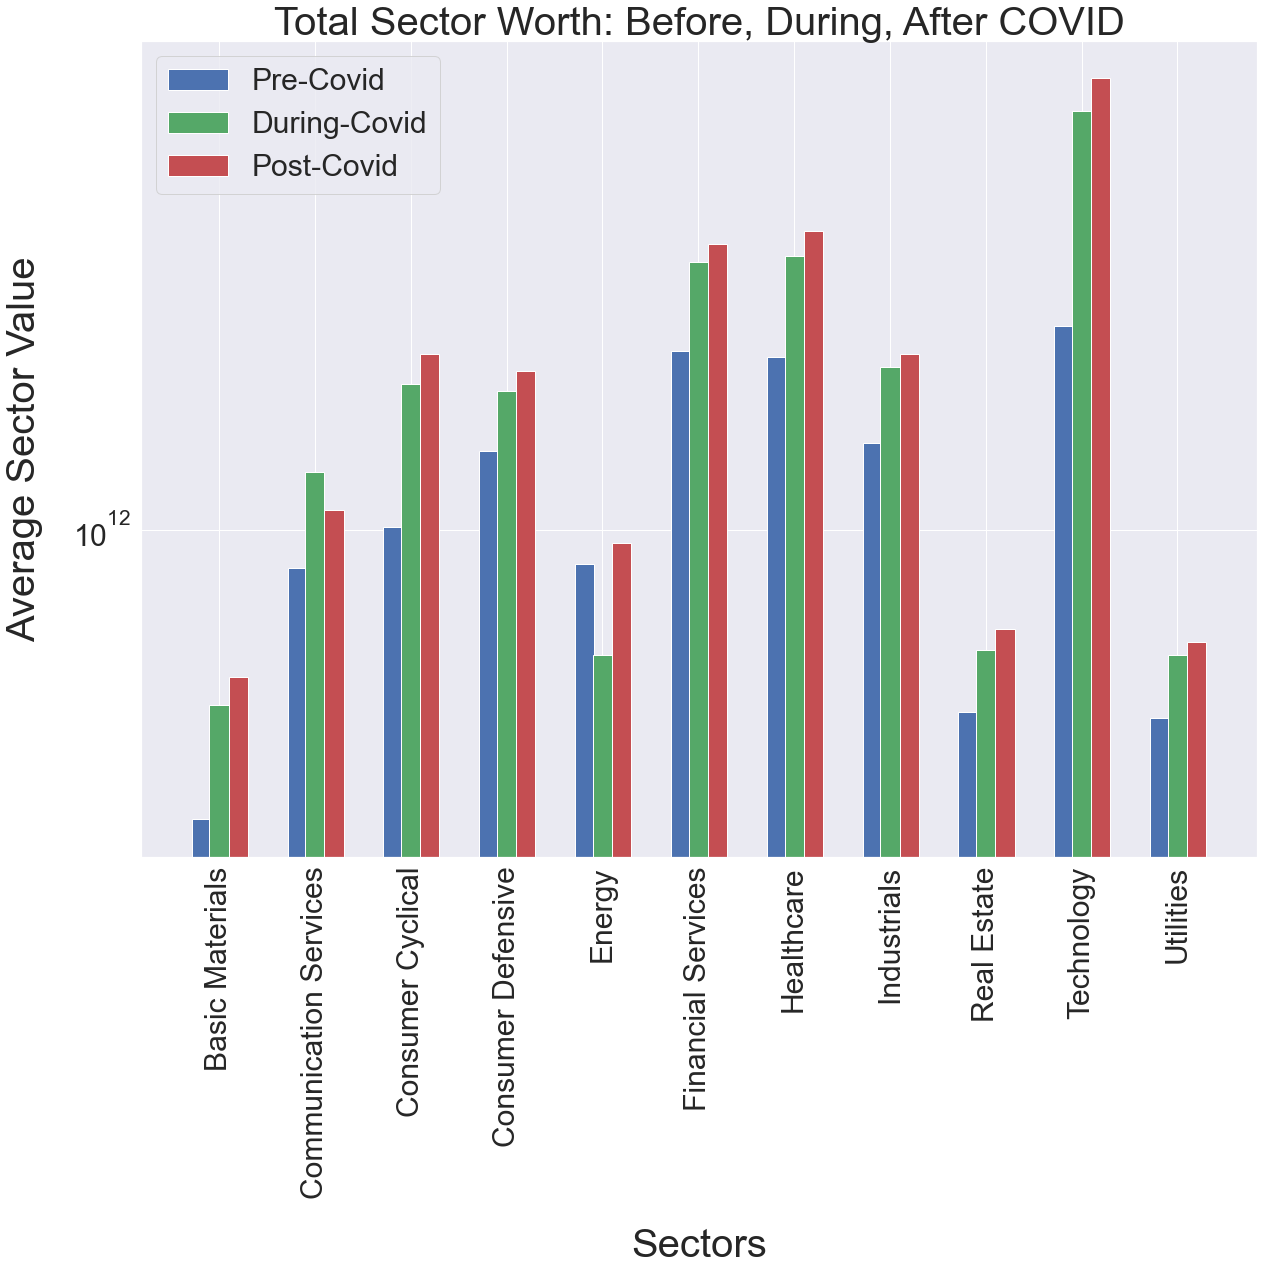

In [46]:
# Total Sector Accumulation of Before, During, After
before_sector_total = before_table.groupby('Sector')['Marketcap'].sum()/(5*365)

during_sector_total = during_table.groupby('Sector')['Marketcap'].sum()/((2*365)+30)
during_sector_total= during_sector_total.sort_values()

post_sector_total = post_table.groupby('Sector')['Marketcap'].sum()/220


x = np.arange(len(during_sector_total.index))

plt.figure (figsize = (20,15))
plt.bar(x-.285, before_sector_total.sort_index(), width=0.2, color='b', align='edge', label = "Pre-Covid")
plt.bar(x, during_sector_total.sort_index(), width=0.2, color='g', align='center', label = "During-Covid")
plt.bar(x+.1, post_sector_total.sort_index(), width=0.2, color='r', align='edge', label = "Post-Covid")

plt.xticks (x, during_sector_total.sort_index().index)
plt.xticks(rotation = 90)
plt.xticks(fontsize = 30)
plt.xlabel("Sectors", fontsize = 40, labelpad= 30)


plt.yticks(fontsize = 30)
plt.yscale('log', base = 10)
plt.ylabel("Average Sector Value", fontsize = 40, labelpad= 30)

plt.title("Total Sector Worth: Before, During, After COVID", fontsize = 40)
plt.legend(prop = {'size' :30})

plt.savefig('Total Sector Worth.png', dpi = 30)

plt.show()

In [47]:
before_sector_total.to_frame()

,Marketcap
Sector,
Basic Materials,3.165203e+11
Communication Services,8.579184e+11
Consumer Cyclical,1.010417e+12
Consumer Defensive,1.367679e+12
Energy,8.707993e+11
Financial Services,2.030677e+12
Healthcare,1.984073e+12
Industrials,1.410075e+12
Real Estate,4.843517e+11


In [48]:
during_before_sector_total = (during_sector_total- before_sector_total)/before_sector_total
# during_before_sector_total = during_before_sector_total.to_frame()
during_before_sector_total

Sector
Basic Materials           0.578047
Communication Services    0.467090
Consumer Cyclical         0.763044
Consumer Defensive        0.269188
Energy                   -0.301640
Financial Services        0.424799
Healthcare                0.489979
Industrials               0.349427
Real Estate               0.282742
Technology                1.348581
Utilities                 0.283438
Name: Marketcap, dtype: float64

In [49]:
post_before_sector_total = (post_sector_total- before_sector_total)/ before_sector_total
# post_before_sector_total = post_before_sector_total.to_frame()
post_before_sector_total

Sector
Basic Materials           0.763280
Communication Services    0.258429
Consumer Cyclical         0.987823
Consumer Defensive        0.371780
Energy                    0.088706
Financial Services        0.529356
Healthcare                0.650066
Industrials               0.422089
Real Estate               0.389422
Technology                1.672953
Utilities                 0.351502
Name: Marketcap, dtype: float64

In [50]:
post_during_sector_total = (post_sector_total - during_sector_total)/during_sector_total
# post_during_sector_total = post_during_sector_total.to_frame()
post_during_sector_total

Sector
Basic Materials           0.117381
Communication Services   -0.142228
Consumer Cyclical         0.127495
Consumer Defensive        0.080833
Energy                    0.558947
Financial Services        0.073384
Healthcare                0.107442
Industrials               0.053847
Real Estate               0.083166
Technology                0.138114
Utilities                 0.053032
Name: Marketcap, dtype: float64

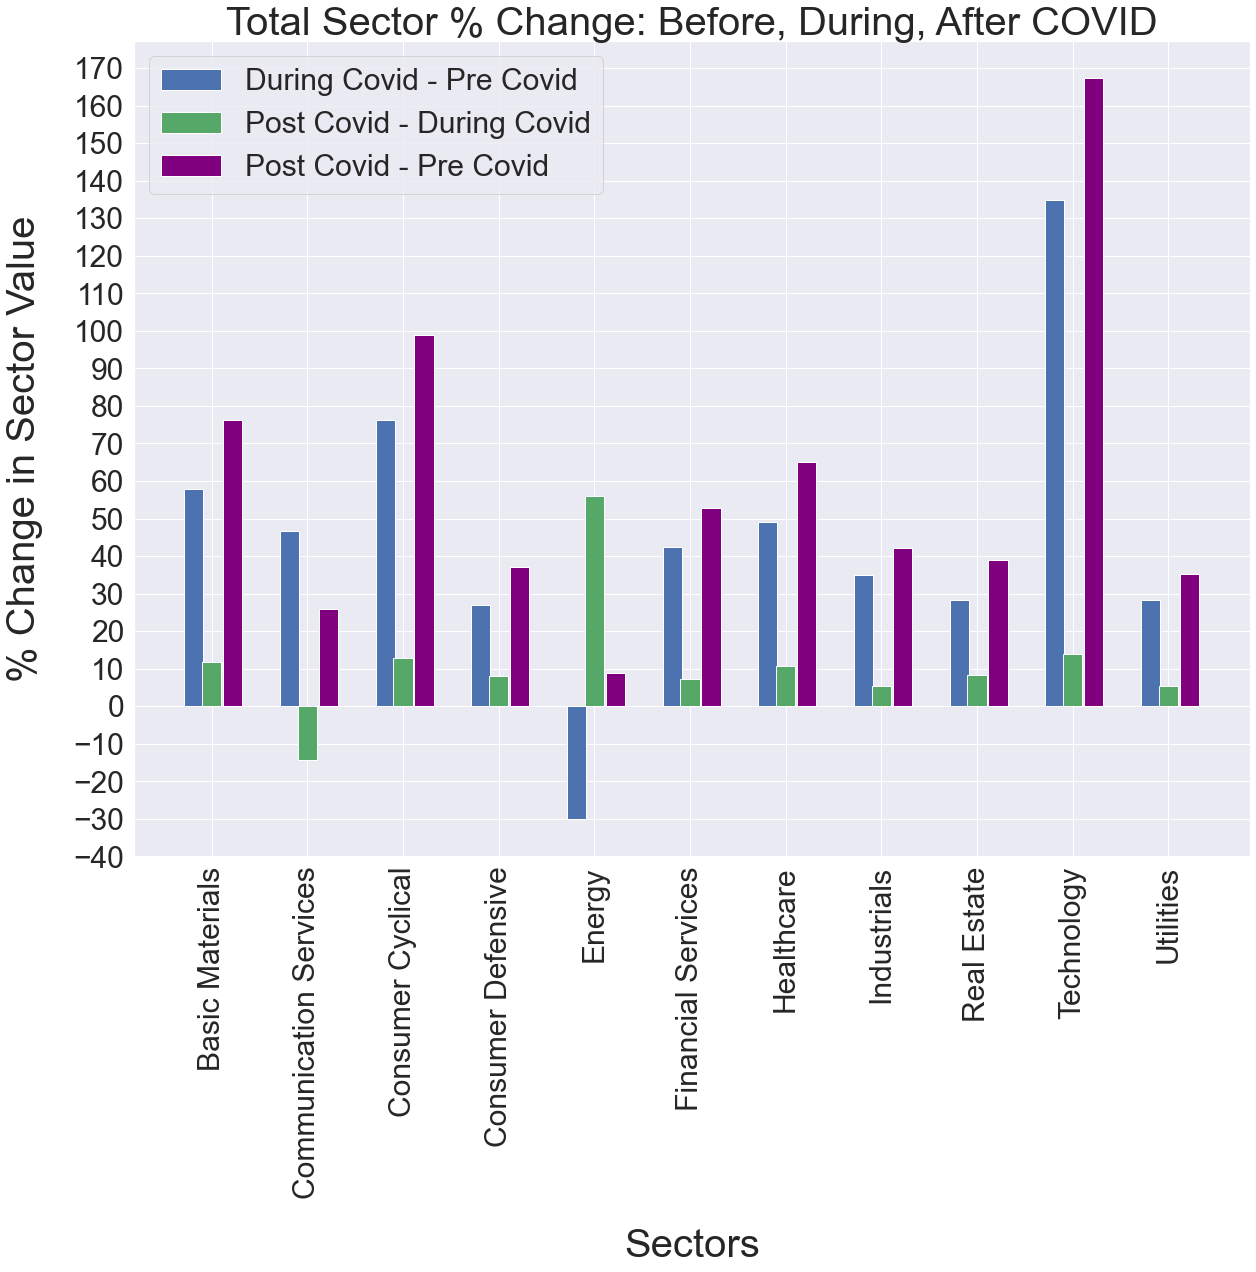

In [51]:
# Total Sector Accumulation of Before, During, After
# before_sector_total = before_table.groupby('Sector')['Marketcap'].sum()/(5*365)

# during_sector_total = during_table.groupby('Sector')['Marketcap'].sum()/((2*365)+30)
# during_sector_total= during_sector_total.sort_values()

# post_sector_total = post_table.groupby('Sector')['Marketcap'].sum()/220


x = np.arange(len(post_during_sector_total.index))

plt.figure (figsize = (20,15))
plt.bar(x-.285, during_before_sector_total.sort_index()*100, width=0.2, color='b', align='edge', label = "During Covid - Pre Covid")
plt.bar(x, post_during_sector_total.sort_index()*100, width=0.2, color='g', align='center', label = "Post Covid - During Covid")
plt.bar(x+.12, post_before_sector_total.sort_index()*100, width=0.2, color='purple', align='edge', label = "Post Covid - Pre Covid")

plt.xticks (x, during_sector_total.sort_index().index)
plt.xticks(rotation = 90)
plt.xticks(fontsize = 30)
plt.xlabel("Sectors", fontsize = 40, labelpad= 30)

plt.yticks(np.arange(-40,180,step=10))
plt.yticks(fontsize = 30)
plt.ylabel("% Change in Sector Value", fontsize = 40, labelpad= 30)

plt.title("Total Sector % Change: Before, During, After COVID", fontsize = 40)
plt.legend(prop = {'size' :30})

plt.savefig('Total Sector Worth.png', dpi = 30)

plt.show()

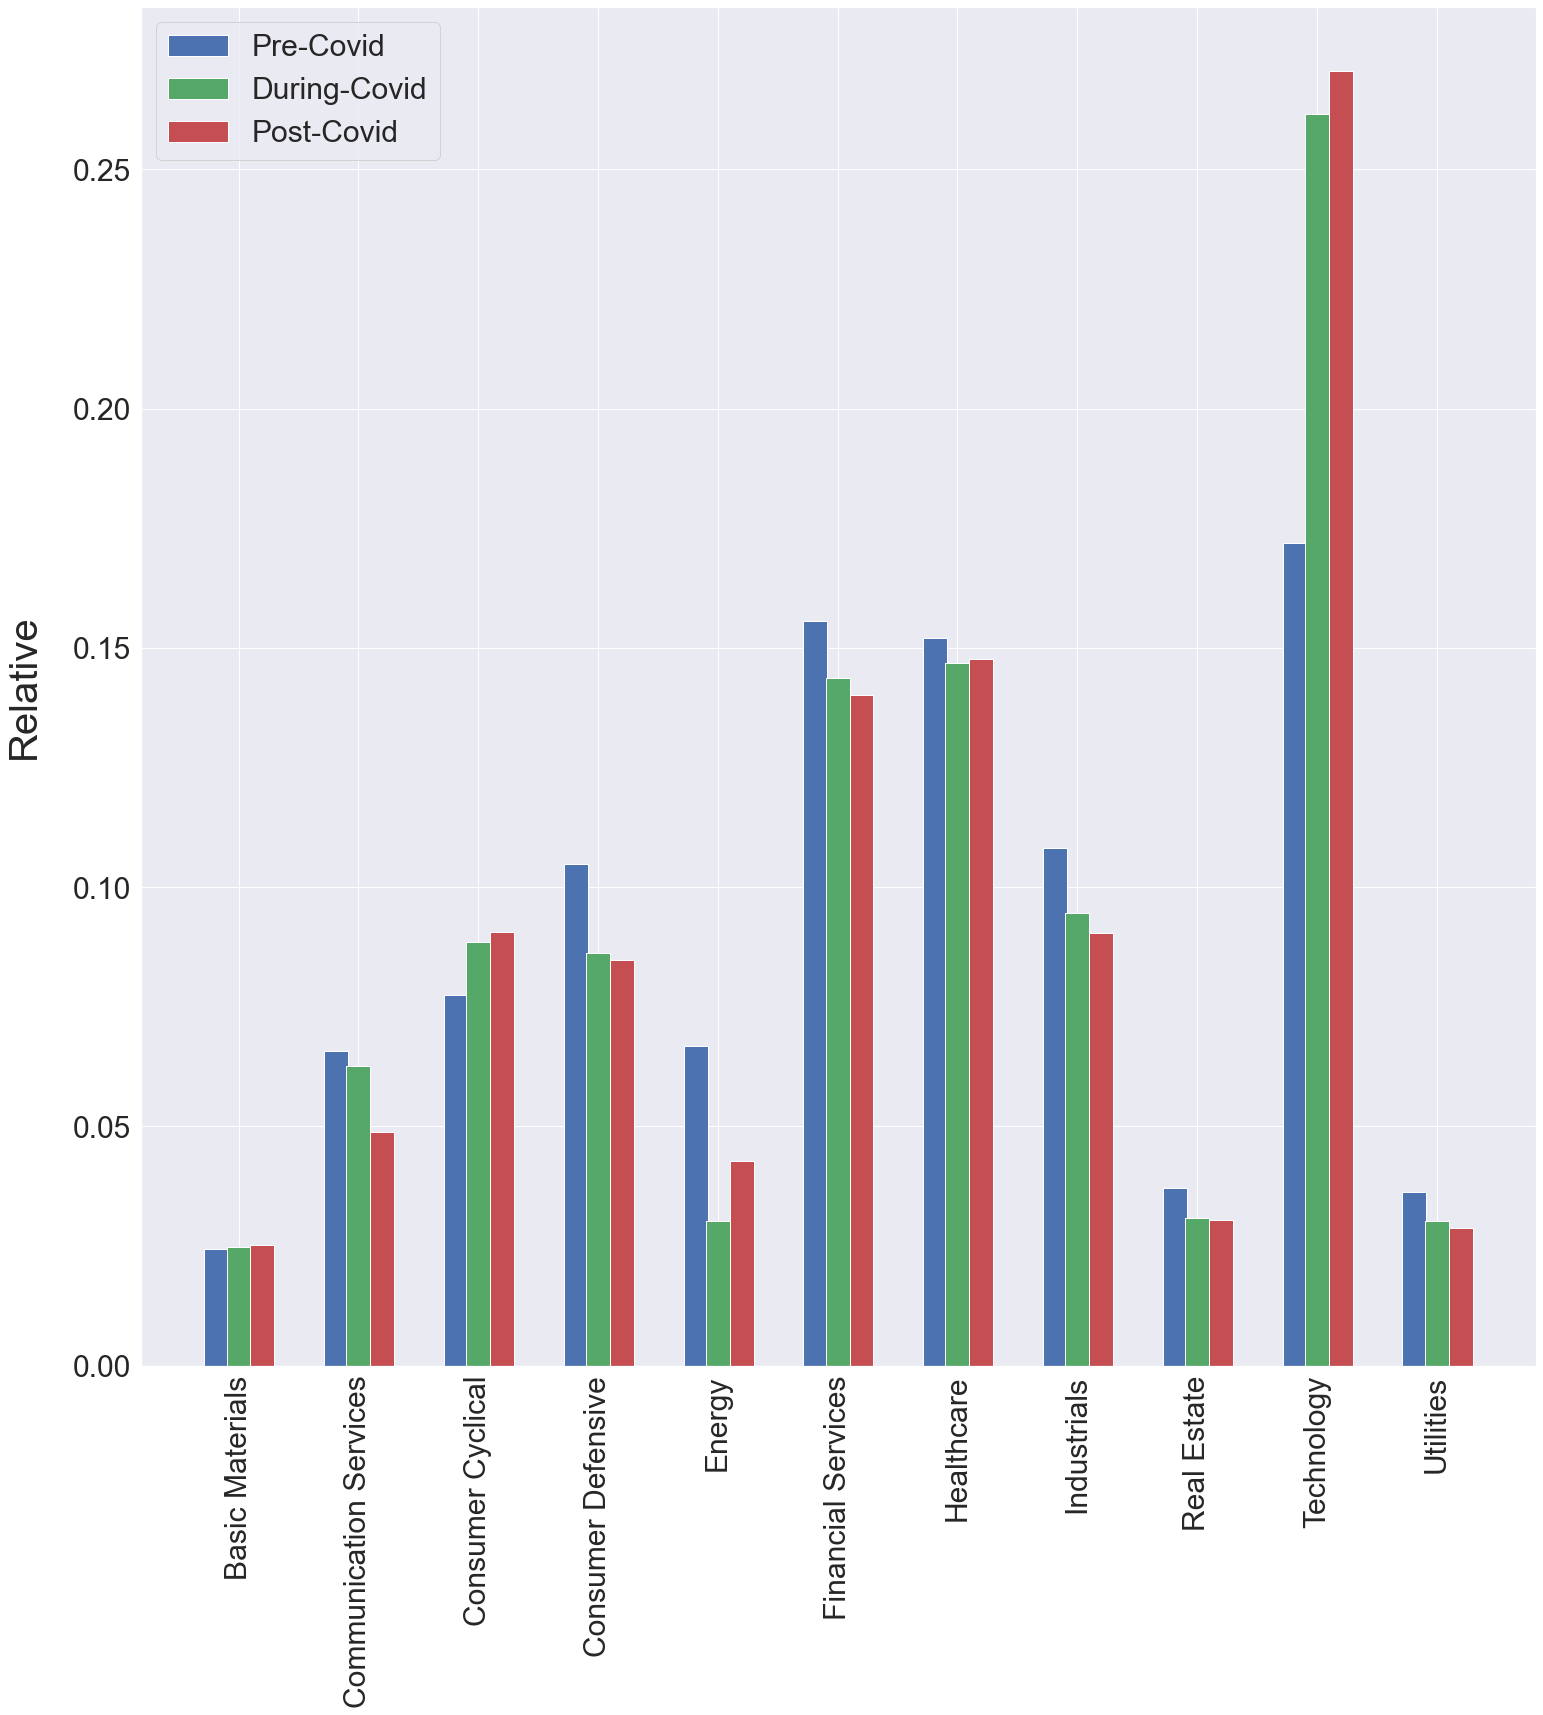

In [52]:
# Relative to Entire Market
# Represented a little better below in next code cell

before_relative = before_sector_total.to_frame()
before_relative["Relative"] = before_relative.Marketcap/before_relative.Marketcap.sum()

during_relative = during_sector_total.to_frame()
during_relative["Relative"] = during_relative.Marketcap/during_relative.Marketcap.sum()

after_relative = post_sector_total.to_frame()
after_relative["Relative"] = after_relative.Marketcap/after_relative.Marketcap.sum()


y = np.arange(len(during_relative.index))

plt.figure (figsize = (25,25))
plt.bar(y-.285, before_relative["Relative"].sort_index(), width =.2, color='b', align='edge', label = "Pre-Covid")
plt.bar(y, during_relative["Relative"].sort_index(), width =.2, color='g', align='center', label = "During-Covid")
plt.bar(y+.1, after_relative["Relative"].sort_index(), width =.2, color='r', align='edge', label = "Post-Covid")

plt.xticks(fontsize = 30, rotation= 90)
plt.xticks (x, during_relative.sort_index().index)

plt.yticks(fontsize = 30)
plt.ylabel("Relative", fontsize = 40, labelpad= 30)


plt.legend(prop = {'size' :30})
plt.show()

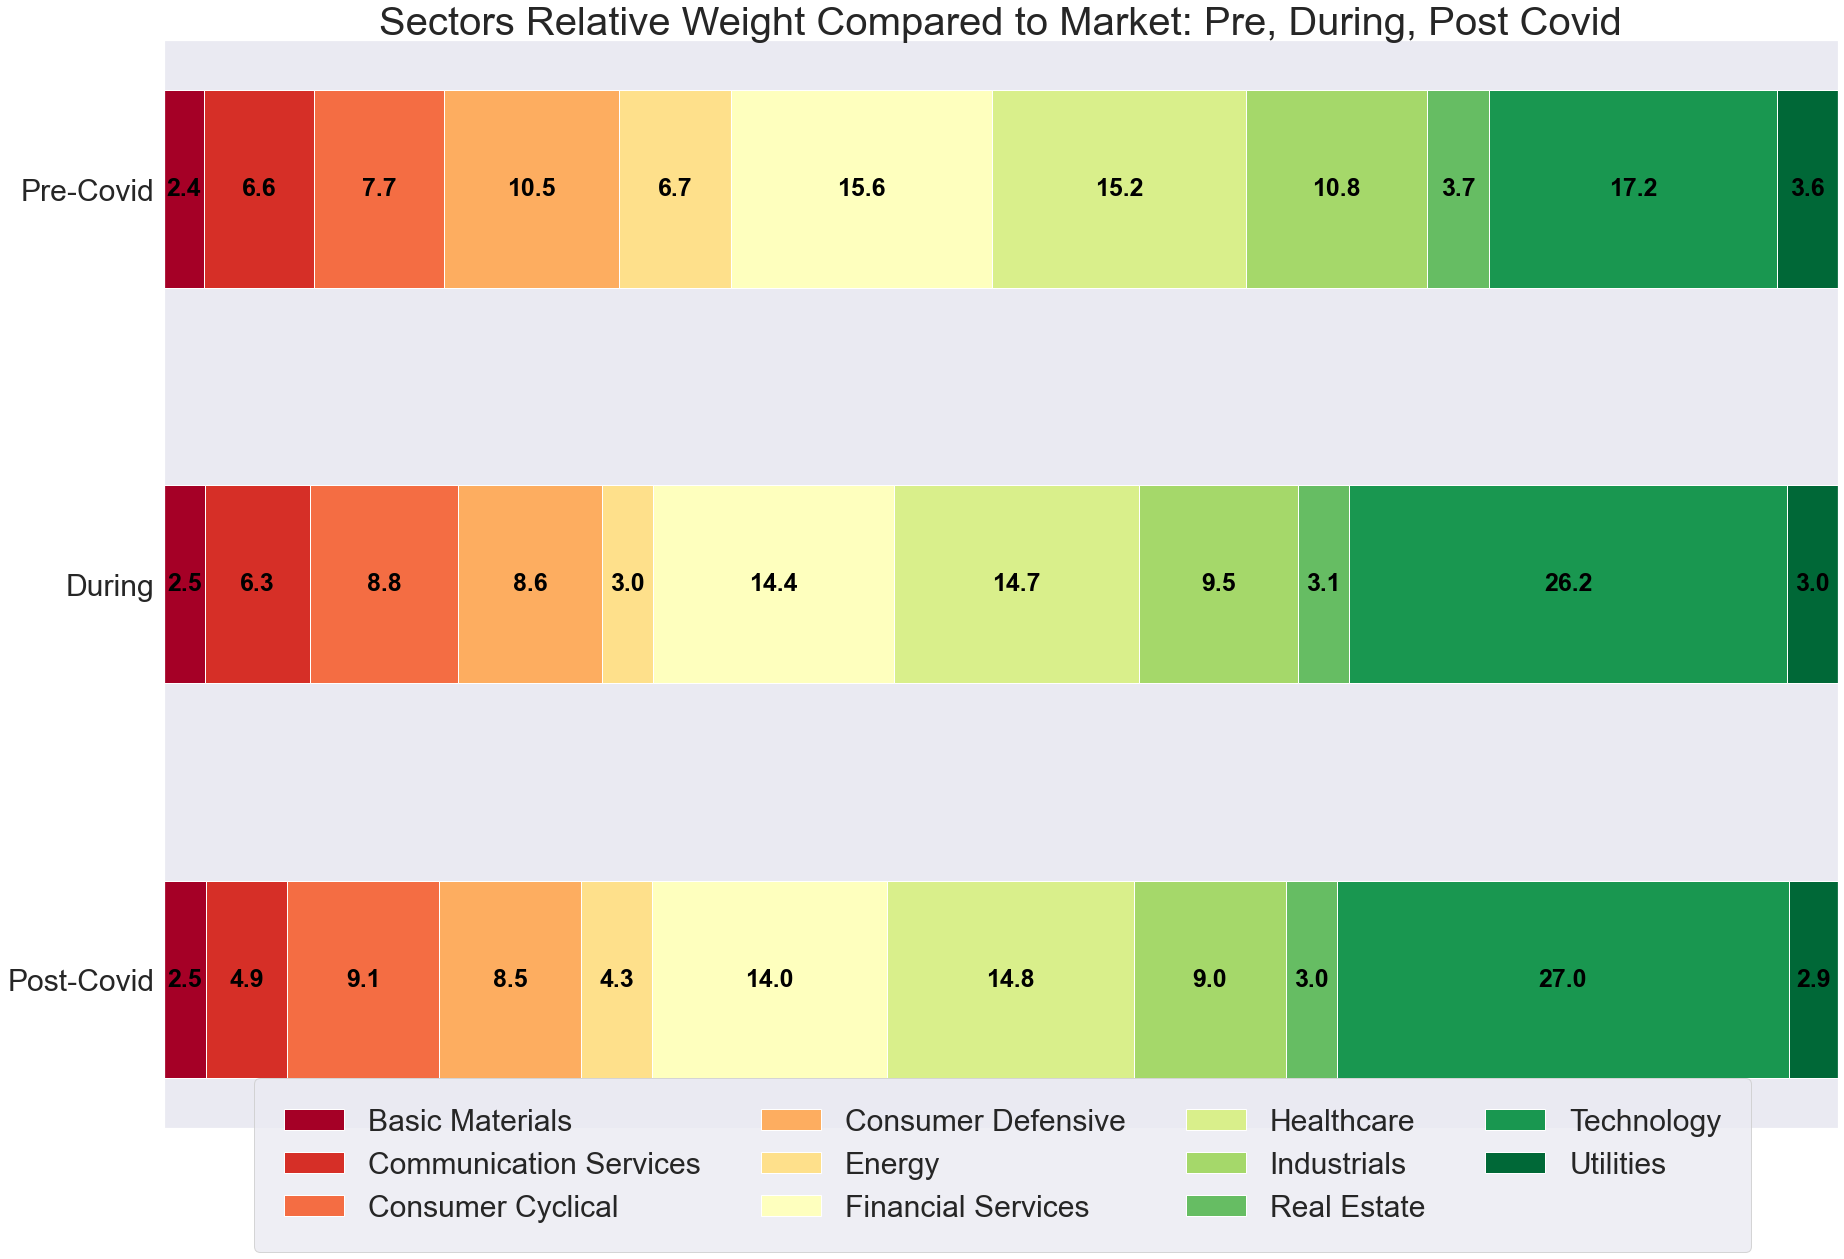

In [53]:
# I weighed each sector by overall market during three time periods: Before, During, After

category_names = list(before_relative.sort_index().index)

results = {
    'Pre-Covid': list(before_relative.Relative.sort_index()*100),
    'During': list(during_relative.Relative.sort_index()*100),
    'Post-Covid': list(after_relative.Relative.sort_index()*100),
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from time period labels to a list of relative weights of sectors.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0, 1, data.shape[1]))

    fig, ax = plt.subplots(figsize=(30, 20))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(float(c),1)), ha='center', va='center', weight="bold", fontsize=25,
                    color="black")
    plt.yticks(fontsize = 30)
    
    plt.legend(ncol=4, bbox_to_anchor=(.045, -.128),
              loc='lower left', borderpad= 1, fontsize=30)
    
    plt.title("Sectors Relative Weight Compared to Market: Pre, During, Post Covid", fontdict={"fontsize":40}, y= 1)

    return fig, ax


survey(results, category_names)
plt.show()

In [54]:
# PreCovid vs During Differences

print(before_relative.Relative.sort_index()*100)
print("-"*25)
print(during_relative.Relative.sort_index()*100)
print("-"*25)
print(after_relative.Relative.sort_index()*100)

Sector
Basic Materials            2.425773
Communication Services     6.574983
Consumer Cyclical          7.743710
Consumer Defensive        10.481723
Energy                     6.673700
Financial Services        15.562863
Healthcare                15.205695
Industrials               10.806641
Real Estate                3.712013
Technology                17.188071
Utilities                  3.624828
Name: Relative, dtype: float64
-------------------------
Sector
Basic Materials            2.481116
Communication Services     6.252137
Consumer Cyclical          8.848900
Consumer Defensive         8.622546
Energy                     3.020807
Financial Services        14.372093
Healthcare                14.684646
Industrials                9.451854
Real Estate                3.086211
Technology                26.164328
Utilities                  3.015361
Name: Relative, dtype: float64
-------------------------
Sector
Basic Materials            2.518323
Communication Services     4.871506
C

In [55]:
check = during_relative.Relative.sort_index()*100 - before_relative.Relative.sort_index()*100
check = check.to_frame()
check = check.rename(columns={"Relative": "Relative Difference: During vs Before"})
check

,Relative Difference: During vs Before
Sector,
Basic Materials,0.055344
Communication Services,-0.322846
Consumer Cyclical,1.105189
Consumer Defensive,-1.859178
Energy,-3.652893
Financial Services,-1.190770
Healthcare,-0.521049
Industrials,-1.354787
Real Estate,-0.625802


In [56]:
two_check = after_relative.Relative.sort_index()*100 - during_relative.Relative.sort_index()*100
two_check = two_check.to_frame()
two_check["% Relative Difference: During vs Before"] = check["Relative Difference: During vs Before"]
two_check = two_check.rename(columns={"Relative": "% Relative Difference: After vs During"})
two_check = two_check[["% Relative Difference: During vs Before", "% Relative Difference: After vs During"]]
# two_check.merge(check,left_on='Relative', right_on='Relative Difference: During vs Before')
# check.merge(two_check, how='inner', on='Relative Difference: During vs Before')
two_check

,% Relative Difference: During vs Before,% Relative Difference: After vs During
Sector,,
Basic Materials,0.055344,0.037206
Communication Services,-0.322846,-1.380631
Consumer Cyclical,1.105189,0.213990
Consumer Defensive,-1.859178,-0.156957
Energy,-3.652893,1.256961
Financial Services,-1.190770,-0.358876
Healthcare,-0.521049,0.087630
Industrials,-1.354787,-0.403757
Real Estate,-0.625802,-0.049639


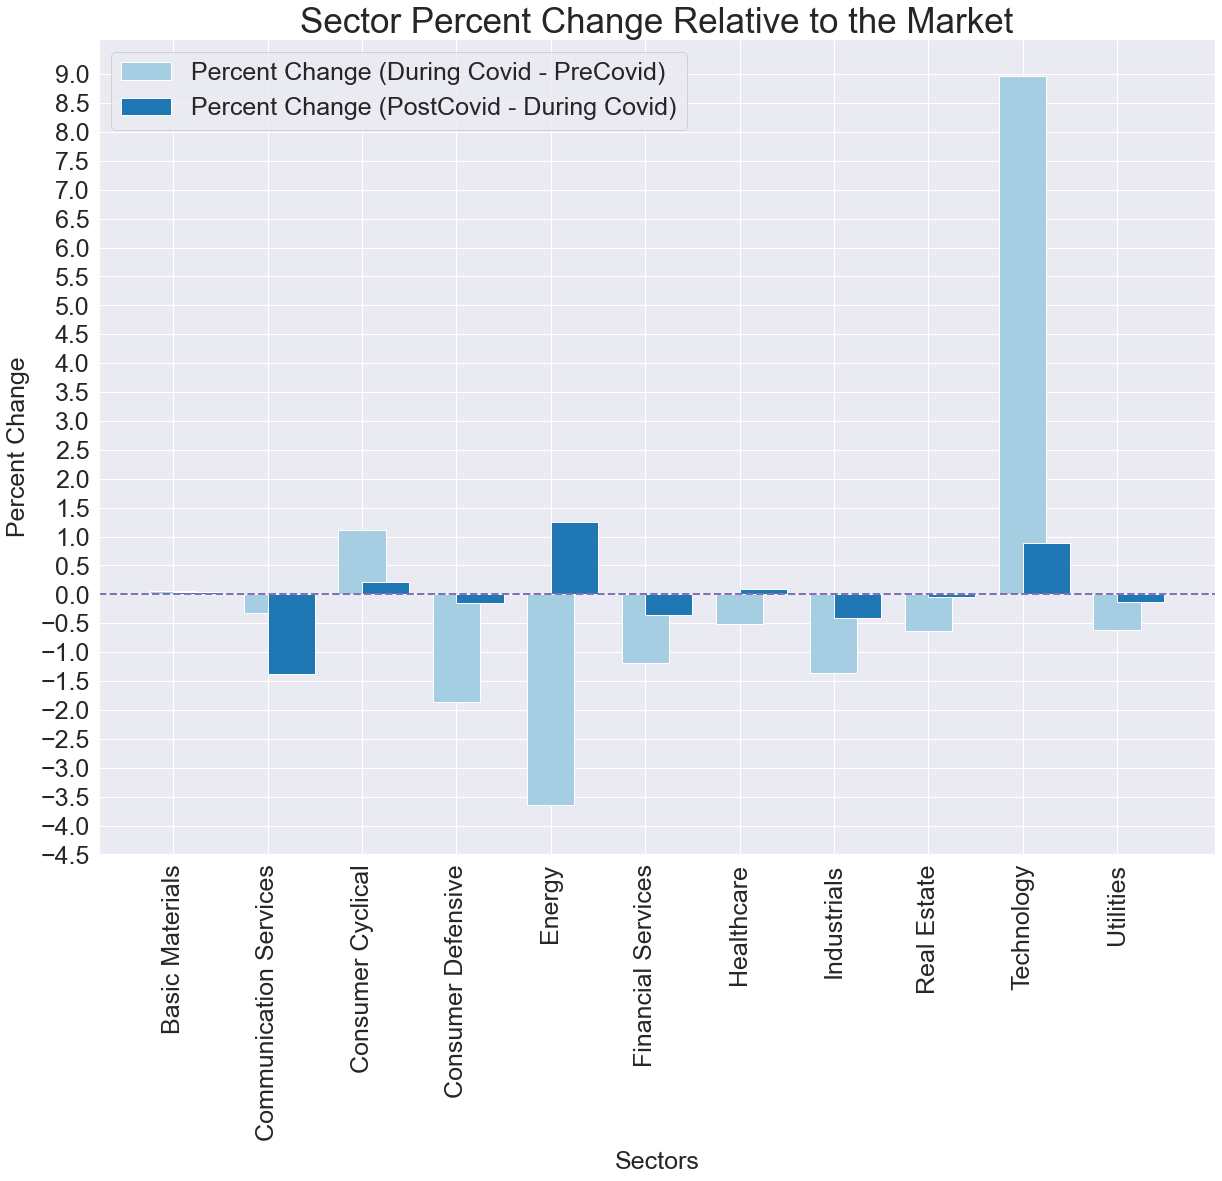

In [57]:
# PreCovid vs During Percent Change
plt.figure(figsize = (20,15))
# plt.scatter(category_names,(during_relative.Relative.sort_index()*100)- (before_relative.Relative.sort_index()*100), s = 200, label = "Percent Change (Covid-PreCovid)")
# plt.scatter(category_names,(after_relative.Relative.sort_index()*100)- (during_relative.Relative.sort_index()*100), s = 200, c = "r", label = "Percent Change (PostCovid-During Covid)" )

plt.bar(category_names,(during_relative.Relative.sort_index()*100)- (before_relative.Relative.sort_index()*100), label = "Percent Change (During Covid - PreCovid)", width = .5)
plt.bar(category_names,(after_relative.Relative.sort_index()*100)- (during_relative.Relative.sort_index()*100), label = "Percent Change (PostCovid - During Covid)",align = "edge", width = .5)

plt.xticks(fontsize = 25, rotation = 90)
plt.xlabel("Sectors", fontsize = 25, labelpad= 10)

plt.yticks(np.arange(-4.5,9.5,step=.5))
plt.yticks(fontsize = 25)
plt.ylabel("Percent Change", fontsize = 25, labelpad= 10)

plt.axhline(0, color='m',linewidth=2, linestyle = "--")

plt.title("Sector Percent Change Relative to the Market", fontdict = {"fontsize": 35})
plt.legend(fontsize = 25)
plt.show()

In [58]:
check = during_relative.Relative.sort_index()*100- before_relative.Relative.sort_index()*100
                                                     
check.sum()

4.440892098500626e-15

In [59]:
# Based on Previous Display, Consumer Cyclical and Technology both experienced great increases. Let's see the industries
# that make up the top 5 from both sectors

# We'll also see thee industries that were most hurt by 
before_table_interested_sectors = before_table[(before_table.Sector == "Technology") | (before_table.Sector == "Consumer Cyclical")]
before_table_interested_sectors.Sector.value_counts()
before_symbols = list(before_table_interested_sectors.Symbol.unique())
before_table_interested_sectors["Industry"] = np.nan
before_table_interested_sectors

during_table_interested_sectors = during_table[(during_table.Sector == "Technology") | (during_table.Sector == "Consumer Cyclical")]
during_symbols = list(during_table_interested_sectors.Symbol.unique())
during_table_interested_sectors["Industry"] = np.nan

# Both tables posess the same symbols
list(during_table_interested_sectors.Symbol.unique())==list(before_table_interested_sectors.Symbol.unique())

C:\Users\gonza\AppData\Local\Temp\ipykernel_15272\3858944999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_table_interested_sectors["Industry"] = np.nan
C:\Users\gonza\AppData\Local\Temp\ipykernel_15272\3858944999.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_table_interested_sectors["Industry"] = np.nan


True

In [66]:
# Takes about 10 minutes

objects = []
for i in before_symbols:
    objects.append(yf.Ticker(i).info)

In [67]:
# Iterates through objects (dictionaries) to fill in missing data
for i in range(len(objects)):
    before_table_interested_sectors.loc[(before_table_interested_sectors['Symbol'] == objects[i]["symbol"] ), 'Industry'] = str(objects[i]["industry"])
    during_table_interested_sectors.loc[(during_table_interested_sectors['Symbol'] == objects[i]["symbol"] ), 'Industry'] = str(objects[i]["industry"])

In [68]:
before_table_interested_sectors
during_table_interested_sectors
objects[0]["industry"]

'Information Technology Services'

In [69]:
# Breaks down so there are no symbol duplicates

unique_symbols_table = during_table_interested_sectors.drop_duplicates(subset='Symbol', keep="last")
unique_symbols_table[unique_symbols_table.Sector == "Technology"]

,Date,Symbol,Adj Close,Close,Volume,Sector,Num_shares,Marketcap,Name,Year,Industry
18881,2021-12-31,ACN,413.477997,414.549988,1163200.0,Technology,6.330560e+08,2.624334e+11,Accenture plc,2021,Information Technology Services
28394,2021-12-31,ADBE,567.059998,567.059998,1581400.0,Technology,4.680000e+08,2.653841e+11,Adobe Inc.,2021,Software—Infrastructure
50591,2021-12-31,AKAM,117.040001,117.040001,717400.0,Technology,1.603050e+08,1.876210e+10,"Akamai Technologies, Inc.",2021,Software—Infrastructure
91814,2021-12-31,AMD,143.899994,143.899994,49448100.0,Technology,1.207610e+09,1.737751e+11,"Advanced Micro Devices, Inc.",2021,Semiconductors
129866,2021-12-31,APH,87.459999,87.459999,1213900.0,Technology,5.980280e+08,5.230353e+10,Amphenol Corporation,2021,Electronic Components
...,...,...,...,...,...,...,...,...,...,...,...
1436318,2021-12-31,TRMB,87.190002,87.190002,405900.0,Technology,2.510080e+08,2.188539e+10,Trimble Inc.,2021,Scientific & Technical Instruments
1445831,2021-12-31,TYL,537.950012,537.950012,183000.0,Technology,4.097630e+07,2.204320e+10,"Tyler Technologies, Inc.",2021,Software—Application
1487054,2021-12-31,VRSN,253.820007,253.820007,345500.0,Technology,1.110780e+08,2.819382e+10,"VeriSign, Inc.",2021,Software—Infrastructure
1550474,2021-12-31,WDC,65.209999,65.209999,1857500.0,Technology,3.116230e+08,2.032094e+10,Western Digital Corporation,2021,Computer Hardware


In [70]:
unique_symbols_table[unique_symbols_table.Sector == "Consumer Cyclical"].Industry.value_counts()

Specialty Retail                      8
Packaging & Containers                6
Restaurants                           6
Travel Services                       5
Resorts & Casinos                     5
Residential Construction              4
Apparel Manufacturing                 3
Auto Parts                            3
Auto Manufacturers                    3
Internet Retail                       3
Auto & Truck Dealerships              2
Apparel Retail                        2
Lodging                               2
Home Improvement Retail               2
Furnishings, Fixtures & Appliances    2
Personal Services                     1
Building Products & Equipment         1
Industrial Distribution               1
Footwear & Accessories                1
Leisure                               1
Luxury Goods                          1
Name: Industry, dtype: int64

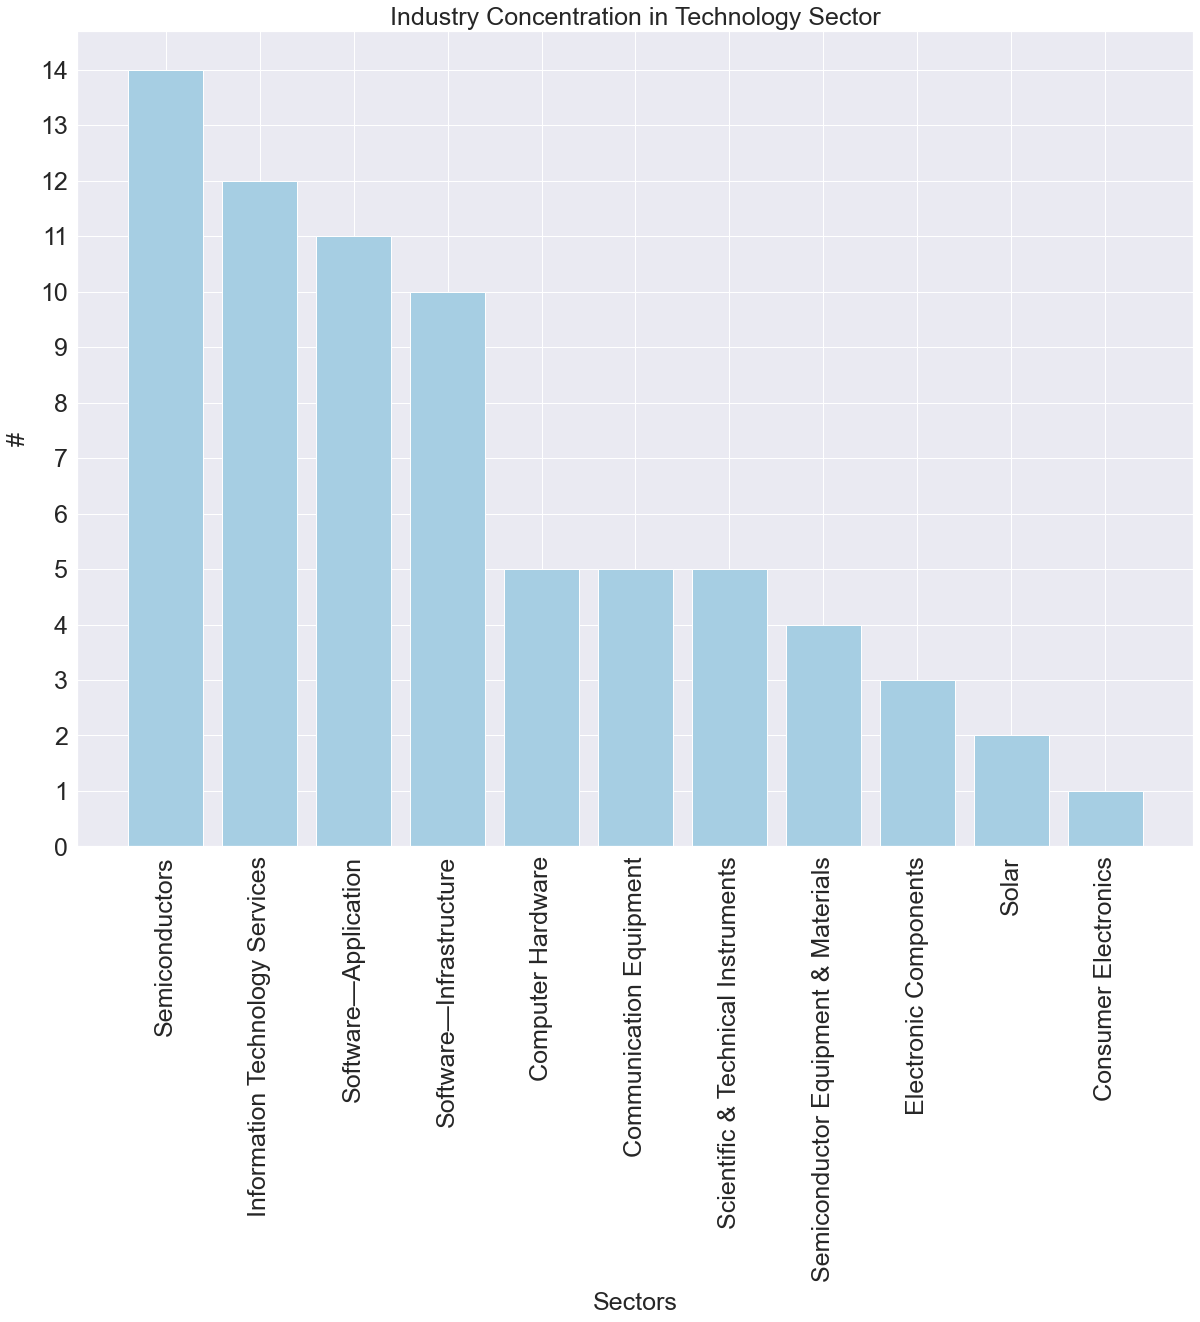

In [71]:
# Industry Concentration within Technology Sector

plt.figure(figsize=(20,15))
plt.bar(unique_symbols_table[unique_symbols_table.Sector == "Technology"].Industry.value_counts().index, unique_symbols_table[unique_symbols_table.Sector == "Technology"].Industry.value_counts())

plt.xticks(fontsize=25, rotation = 90)
plt.xlabel("Sectors", fontsize = 25, labelpad= 10)


plt.yticks(fontsize=25)
plt.yticks(np.arange(0,15,step=1))
plt.ylabel("#", fontsize = 25, labelpad= 10)


plt.title("Industry Concentration in Technology Sector", fontsize = 25)
plt.show()

In [72]:
# Analysis of Industry Strength in Tech Pre-Covid

before_sector_tech=  before_table_interested_sectors[before_table_interested_sectors.Sector == "Technology"]

before_sector_tech= before_sector_tech.groupby('Industry')['Marketcap'].sum() 

before_sector_tech = before_sector_tech.to_frame()

before_sector_tech["Relative"] = before_sector_tech.Marketcap/before_sector_tech.Marketcap.sum()

before_sector_tech = before_sector_tech.sort_index()

before_sector_tech

,Marketcap,Relative
Industry,,
Communication Equipment,2.521864e+14,0.061614
Computer Hardware,9.266670e+13,0.022640
Consumer Electronics,7.833954e+14,0.191399
Electronic Components,8.790670e+13,0.021477
Information Technology Services,5.118449e+14,0.125054
Scientific & Technical Instruments,6.242280e+13,0.015251
Semiconductor Equipment & Materials,8.833929e+13,0.021583
Semiconductors,8.091783e+14,0.197698
Software—Application,3.109625e+14,0.075974


In [73]:
# Analysis of Industry Strength in Tech During Covid

during_sector_tech=  during_table_interested_sectors[during_table_interested_sectors.Sector == "Technology"]

during_sector_tech= during_sector_tech.groupby('Industry')['Marketcap'].sum() 

during_sector_tech = during_sector_tech.to_frame()

during_sector_tech["Relative"] = during_sector_tech.Marketcap/during_sector_tech.Marketcap.sum()

during_sector_tech = during_sector_tech.sort_index()

during_sector_tech ["Difference"] = during_sector_tech.Relative - before_sector_tech.Relative
during_sector_tech = during_sector_tech.sort_values(by = ["Difference"])
during_sector_tech

,Marketcap,Relative,Difference
Industry,,,
Information Technology Services,3.017070e+14,0.075368,-0.049686
Communication Equipment,1.470376e+14,0.036731,-0.024883
Semiconductors,7.497590e+14,0.187294,-0.010404
Computer Hardware,5.019500e+13,0.012539,-0.010101
Electronic Components,5.431371e+13,0.013568,-0.007909
Scientific & Technical Instruments,5.449066e+13,0.013612,-0.001639
Solar,1.467130e+13,0.003665,0.002859
Semiconductor Equipment & Materials,1.080293e+14,0.026986,0.005403
Software—Application,3.271526e+14,0.081725,0.005750


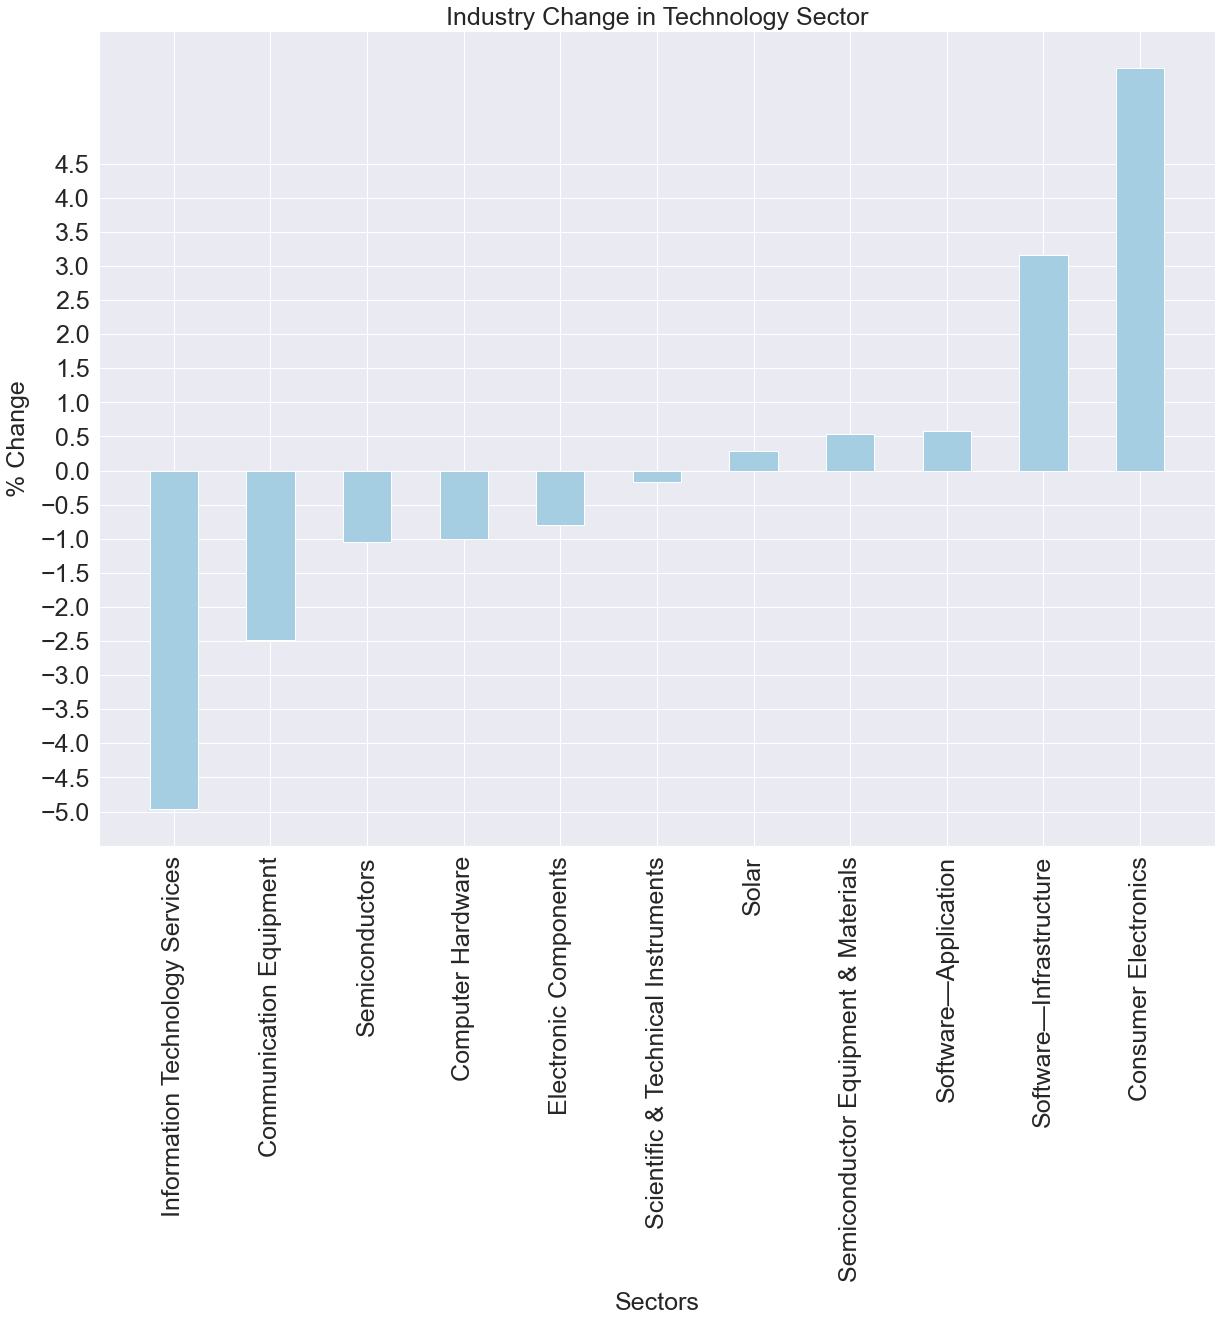

In [74]:
plt.figure(figsize=(20,15))

plt.bar(during_sector_tech.index,(during_sector_tech.Difference * 100), label = "Percent Change (During Covid - PreCovid)", width = .5)

plt.xticks(fontsize = 25, rotation = 90)
plt.xlabel("Sectors", fontsize = 25, labelpad= 10)


plt.yticks(fontsize = 25)
plt.yticks(np.arange(-5,5,step=.5))
plt.ylabel("% Change", fontsize = 25, labelpad= 10)

plt.title("Industry Change in Technology Sector", fontsize = 25)
plt.show()

In [75]:
def industry (df, sector, industry):
    return df[(df.Sector == sector) & (df.Industry == industry)]

# def aggregate_sum (df, aggregation, column_summed):

def companies_industry (df):
        return df.Symbol.unique(),df.Name.unique(),
    

In [76]:
#Consumer Electronics

consum_ele_industry = industry(during_table_interested_sectors, "Technology","Consumer Electronics")
companies_industry(consum_ele_industry)

(array(['AAPL'], dtype=object), array(['Apple Inc.'], dtype=object))

In [77]:
#Software-Infrastructure
soft_infra_industry = industry (during_table_interested_sectors,"Technology","Software—Infrastructure")
companies_industry(soft_infra_industry)

(array(['ADBE', 'AKAM', 'FFIV', 'FLT', 'FTNT', 'MSFT', 'NLOK', 'ORCL',
        'SNPS', 'VRSN'], dtype=object),
 array(['Adobe Inc.', 'Akamai Technologies, Inc.', 'F5, Inc.',
        'FleetCor Technologies, Inc.', 'Fortinet, Inc.',
        'Microsoft Corporation', 'NortonLifeLock Inc.',
        'Oracle Corporation', 'Synopsys, Inc.', 'VeriSign, Inc.'],
       dtype=object))

In [78]:
#Software Appliocation
soft_app_industry = industry (during_table_interested_sectors,"Technology","Information Technology Services")
companies_industry(soft_app_industry)

(array(['ACN', 'BR', 'CDW', 'CTSH', 'DXC', 'EPAM', 'FIS', 'FISV', 'IT',
        'IBM', 'JKHY', 'LDOS'], dtype=object),
 array(['Accenture plc', 'Broadridge Financial Solutions,',
        'CDW Corporation', 'Cognizant Technology Solutions ',
        'DXC Technology Company', 'EPAM Systems, Inc.',
        'Fidelity National Information S', 'Fiserv, Inc.', 'Gartner, Inc.',
        'International Business Machines', 'Jack Henry & Associates, Inc.',
        'Leidos Holdings, Inc.'], dtype=object))

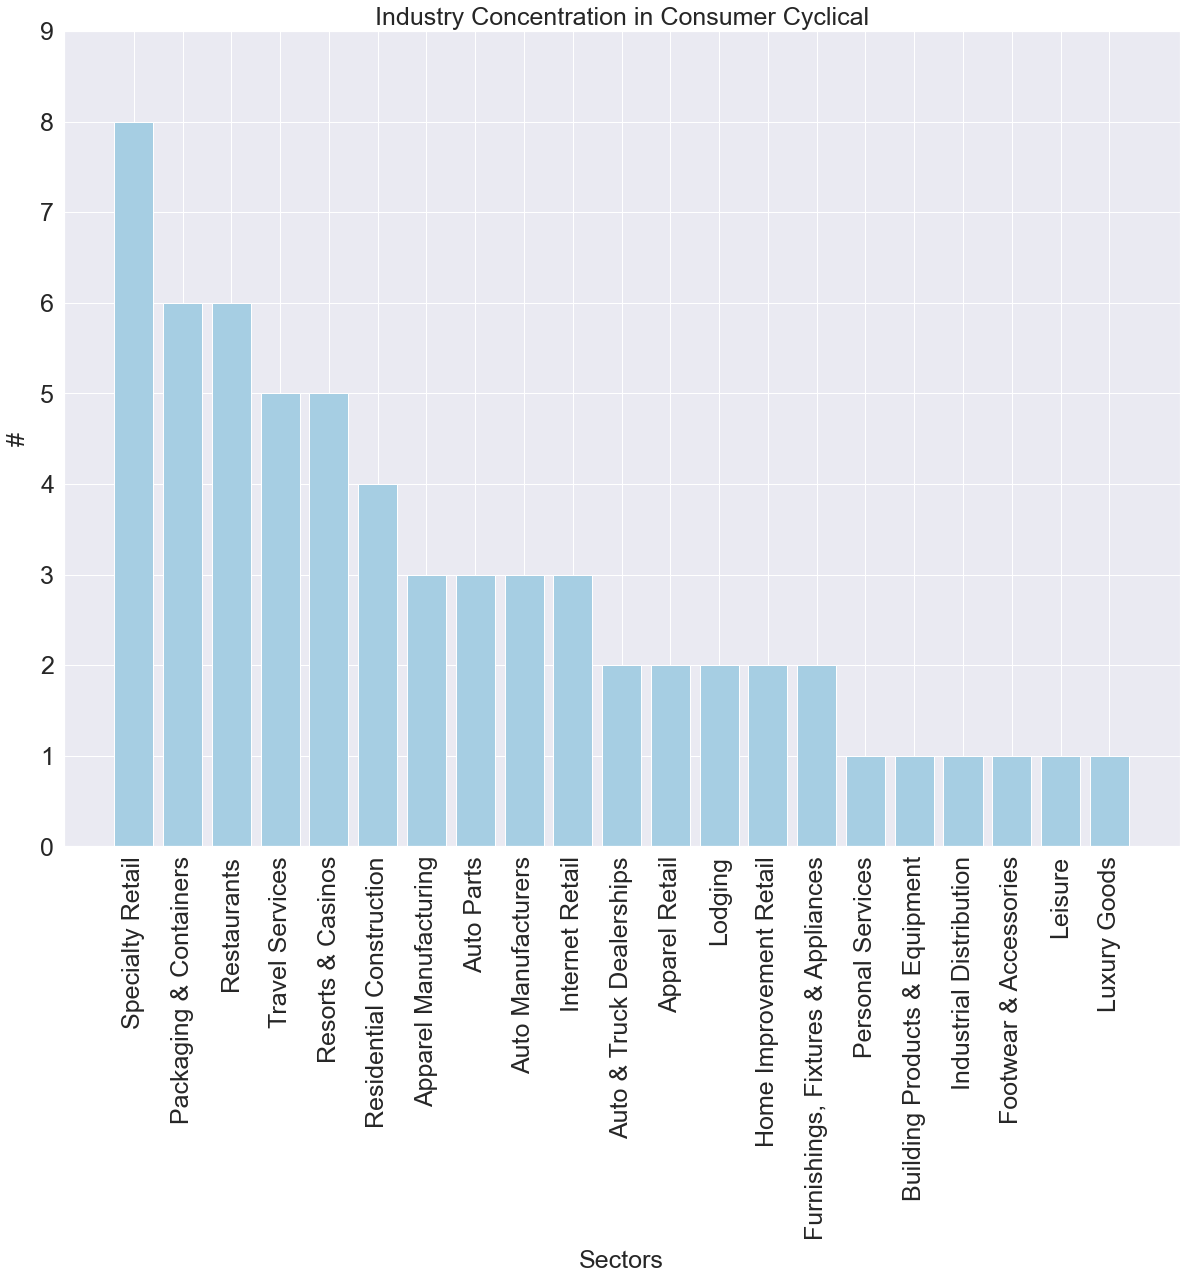

In [79]:
# Industry Concentration within Consumer Cyclical Sector

plt.figure(figsize=(20,15))
plt.bar(unique_symbols_table[unique_symbols_table.Sector == "Consumer Cyclical"].Industry.value_counts().index, unique_symbols_table[unique_symbols_table.Sector == "Consumer Cyclical"].Industry.value_counts())

plt.xticks(fontsize=25, rotation = 90)
plt.xlabel("Sectors", fontsize = 25, labelpad= 10)

plt.yticks(fontsize=25)
plt.yticks(np.arange(0,10,step=1))
plt.ylabel("#", fontsize = 25, labelpad= 10)

plt.title("Industry Concentration in Consumer Cyclical", fontsize = 25)
plt.show()

In [80]:
# Analysis of Industry Strength in Consumer Cyclical Pre-Covid

before_sector_consum=  before_table_interested_sectors[before_table_interested_sectors.Sector == "Consumer Cyclical"]

before_sector_consum= before_sector_consum.groupby('Industry')['Marketcap'].sum() 

before_sector_consum = before_sector_consum.to_frame()

before_sector_consum["Relative"] = before_sector_consum.Marketcap/before_sector_consum.Marketcap.sum()

before_sector_consum = before_sector_consum.sort_index()

before_sector_consum

,Marketcap,Relative
Industry,,
Apparel Manufacturing,5.357481e+13,0.029053
Apparel Retail,9.405561e+13,0.051006
Auto & Truck Dealerships,2.489874e+13,0.013502
Auto Manufacturers,1.924830e+14,0.104383
Auto Parts,4.953463e+13,0.026862
Building Products & Equipment,9.354845e+12,0.005073
Footwear & Accessories,1.285465e+14,0.069710
"Furnishings, Fixtures & Appliances",2.871160e+13,0.015570
Home Improvement Retail,2.789289e+14,0.151262


In [81]:
# Analysis of Industry Strength in Consumer Cyclical During Covid

during_sector_consum=  during_table_interested_sectors[during_table_interested_sectors.Sector == "Consumer Cyclical"]

during_sector_consum= during_sector_consum.groupby('Industry')['Marketcap'].sum() 

during_sector_consum = during_sector_consum.to_frame()

during_sector_consum["Relative"] = during_sector_consum.Marketcap/during_sector_consum.Marketcap.sum()

during_sector_consum = during_sector_consum.sort_index()

during_sector_consum ["Difference"] = during_sector_consum.Relative - before_sector_consum.Relative
during_sector_consum = during_sector_consum.sort_values(by = ["Difference"])
during_sector_consum.Difference

Industry
Travel Services                      -0.071083
Resorts & Casinos                    -0.018933
Packaging & Containers               -0.016738
Apparel Manufacturing                -0.012356
Specialty Retail                     -0.011183
Restaurants                          -0.009929
Furnishings, Fixtures & Appliances   -0.007451
Apparel Retail                       -0.007353
Lodging                              -0.007279
Auto Parts                           -0.006177
Luxury Goods                         -0.003971
Leisure                              -0.003491
Building Products & Equipment        -0.000697
Personal Services                     0.000267
Residential Construction              0.001255
Industrial Distribution               0.002225
Auto & Truck Dealerships              0.003759
Home Improvement Retail               0.007762
Footwear & Accessories                0.008557
Internet Retail                       0.015197
Auto Manufacturers                    0.137618
Name

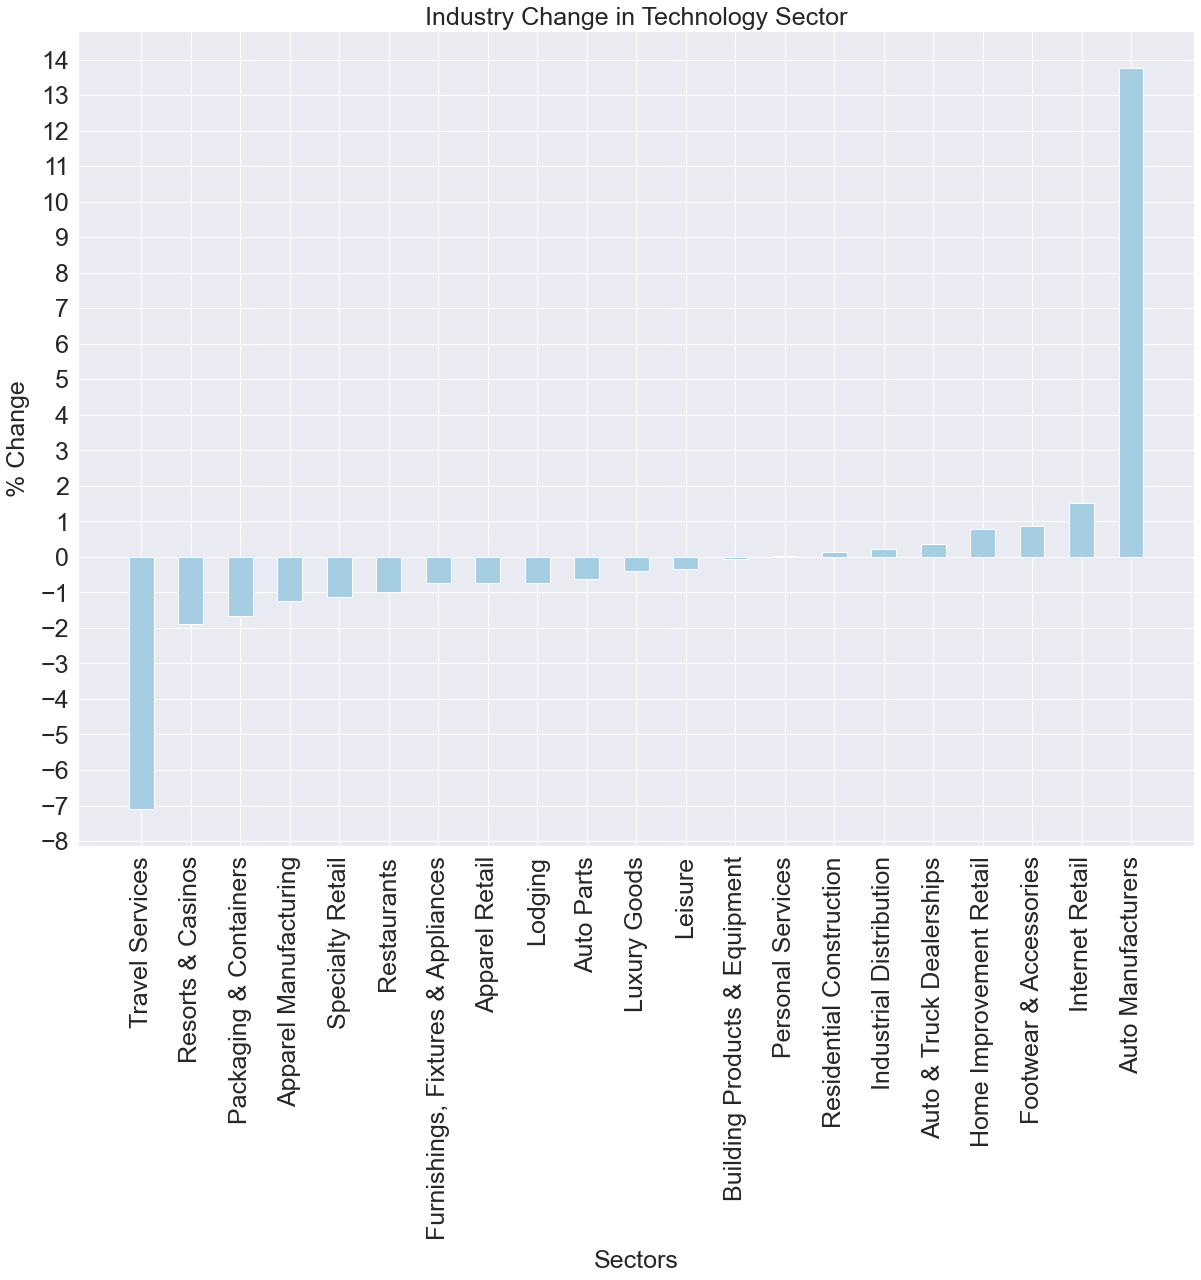

In [82]:
plt.figure(figsize=(20,15))

plt.bar(during_sector_consum.index,(during_sector_consum.Difference * 100), label = "Percent Change (During Covid - PreCovid)", width = .5)

plt.xticks(fontsize = 25, rotation = 90)
plt.xlabel("Sectors", fontsize = 25, labelpad= 10)

plt.yticks(fontsize = 25)
plt.yticks(np.arange(-8,15,step=1))
plt.ylabel("% Change", fontsize = 25, labelpad= 10)

plt.title("Industry Change in Technology Sector", fontsize = 25)
plt.show()

In [83]:
# Auto Manufacturers
auto_industry = industry (during_table_interested_sectors,"Consumer Cyclical","Resorts & Casinos")
companies_industry(auto_industry)

(array(['CZR', 'LVS', 'MGM', 'PENN', 'WYNN'], dtype=object),
 array(['Caesars Entertainment, Inc.', 'Las Vegas Sands Corp.',
        'MGM Resorts International', 'Penn National Gaming, Inc.',
        'Wynn Resorts, Limited'], dtype=object))

In [84]:
# Home Improvement Retail
home_industry = industry (during_table_interested_sectors,"Consumer Cyclical","Home Improvement Retail")
companies_industry(home_industry)

(array(['HD', 'LOW'], dtype=object),
 array(['Home Depot, Inc. (The)', "Lowe's Companies, Inc."], dtype=object))

In [85]:
# Internet Retail
internet_industry = industry (during_table_interested_sectors,"Consumer Cyclical","Internet Retail")
companies_industry(internet_industry)

(array(['AMZN', 'EBAY', 'ETSY'], dtype=object),
 array(['Amazon.com, Inc.', 'eBay Inc.', 'Etsy, Inc.'], dtype=object))

In [86]:
# Footwear & Accessories
foot_industry = industry (during_table_interested_sectors,"Consumer Cyclical","Travel Services")
companies_industry(foot_industry)

(array(['BKNG', 'CCL', 'EXPE', 'NCLH', 'RCL'], dtype=object),
 array(['Booking Holdings Inc. Common St', 'Carnival Corporation',
        'Expedia Group, Inc.', 'Norwegian Cruise Line Holdings ',
        'D/B/A Royal Caribbean Cruises L'], dtype=object))